#  Problem Statement: 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


Dataset Description:

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".



In [398]:
#importing numpy and pandas library
import numpy as np
import pandas as pd

#importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#importing warnings

import warnings
warnings.filterwarnings('ignore')

In [399]:
#importing dataset

data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [400]:
#printimg 1st 5 rows of dataset

data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [401]:
data.shape

(8425, 23)

- This dataset contains 8425 rows and 23 columns

In [402]:
#printing dataset column information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [403]:
data.duplicated().sum()

1663

In [404]:
data.drop_duplicates(inplace=True)

In [405]:
data.shape

(6762, 23)

In [406]:
# checking null values in dataset

data.isnull().sum()

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
dtype: int64

In [407]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [408]:
null_colmns=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow']

In [409]:
data['RainTomorrow'].value_counts()

No     5052
Yes    1572
Name: RainTomorrow, dtype: int64

**Filling the null values based on whether there will be rain tomorrow or not**

In [410]:
data.groupby('RainTomorrow')['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'].median()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
RainTomorrow,,,,,,,,,,,,,,,,
No,12.8,24.1,0.0,4.8,9.8,35.0,11.0,17.0,65.0,46.0,1018.3,1015.7,3.0,3.0,18.0,22.8
Yes,14.0,21.8,1.0,3.8,4.4,43.0,13.0,19.0,78.0,67.0,1015.3,1013.2,7.0,7.0,17.4,20.0


In [411]:
data['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

- This column mentions if there is going to rain or not.

In [412]:
data['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

- This column represents wind direction.

In [413]:
data['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

This column represents wind direction at 9 am.

In [414]:
data['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

This column represents wind direction at 3 pm

**I am going to take mode value of the column based on there will be rain tomorrow or not. To get that I'm going to seperate the data based on its classes i.e Yes and No.**

In [415]:
#this will display data that if it will rain tomorrow
data_yes=data.loc[data['RainTomorrow']=='Yes']
data_yes


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
10,2008-12-11,Albury,13.4,30.4,0.0,NaN,NaN,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,NaN,NaN,20.4,28.8,No,Yes
11,2008-12-12,Albury,15.9,21.7,2.2,NaN,NaN,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes
12,2008-12-13,Albury,15.9,18.6,15.6,NaN,NaN,W,61.0,NNW,...,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes,Yes
16,2008-12-17,Albury,14.1,20.9,0.0,NaN,NaN,ENE,22.0,SSW,...,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8371,2012-10-27,Darwin,25.2,34.1,0.0,7.6,10.2,NW,37.0,WSW,...,72.0,61.0,1010.5,1006.5,5.0,3.0,29.9,32.1,No,Yes
8372,2012-10-28,Darwin,22.9,32.8,5.8,7.4,4.4,N,57.0,N,...,96.0,61.0,1012.1,1007.4,8.0,5.0,23.4,32.0,Yes,Yes
8377,2012-11-02,Darwin,25.6,34.1,1.0,7.6,11.3,N,35.0,NNE,...,71.0,55.0,1011.2,1006.9,4.0,3.0,29.2,33.1,No,Yes
8380,2012-11-05,Darwin,25.8,32.9,0.0,7.6,6.7,N,31.0,N,...,70.0,65.0,1010.2,1006.7,5.0,2.0,30.7,32.0,No,Yes


In [416]:
#this will display data if there is no rain tomorrow
data_no=data.loc[data['RainTomorrow']=='No']
data_no

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [417]:
#Filling nan values in columns in below way:
#data_no will input mode/median values of that particular column if there will be no rain tomorrow
#data_yes will input mode/median values of that particular column if there will be rain tomorrow

data_no['MinTemp']=data['MinTemp'].fillna(data_no['MinTemp'].mode()[0])
data_yes['MinTemp']=data['MinTemp'].fillna(data_yes['MinTemp'].mode()[0])

data_no['MaxTemp']=data['MaxTemp'].fillna(data_no['MaxTemp'].mode()[0])
data_yes['MaxTemp']=data_yes['MaxTemp'].fillna(data_yes['MaxTemp'].mode()[0])

data_no['Rainfall']=data['Rainfall'].fillna(data_no['Rainfall'].median())
data_yes['Rainfall']=data_yes['Rainfall'].fillna(data_yes['Rainfall'].median())

data_no['Evaporation']=data['Evaporation'].fillna(data_no['Evaporation'].mode()[0])
data_yes['Evaporation']=data_yes['Evaporation'].fillna(data_yes['Evaporation'].mode()[0])

data_no['Sunshine']=data['Sunshine'].fillna(data_no['Sunshine'].mode()[0])
data_yes['Sunshine']=data_yes['Sunshine'].fillna(data_yes['Sunshine'].mode()[0])

data_no['WindGustDir']=data['WindGustDir'].fillna(data_no['WindGustDir'].mode()[0])
data_yes['WindGustDir']=data_yes['WindGustDir'].fillna(data_yes['WindGustDir'].mode()[0])

data_no['WindGustSpeed']=data['WindGustSpeed'].fillna(data_no['WindGustSpeed'].median())
data_yes['WindGustSpeed']=data_yes['WindGustSpeed'].fillna(data_yes['WindGustSpeed'].median())

data_no['WindDir9am']=data['WindDir9am'].fillna(data_no['WindDir9am'].mode()[0])
data_yes['WindDir9am']=data_yes['WindDir9am'].fillna(data_yes['WindDir9am'].mode()[0])

data_no['WindDir3pm']=data['WindDir3pm'].fillna(data_no['WindDir3pm'].mode()[0])
data_yes['WindDir3pm']=data_yes['WindDir3pm'].fillna(data_yes['WindDir3pm'].mode()[0])

data_no['WindSpeed9am']=data['WindSpeed9am'].fillna(data_no['WindSpeed9am'].median())
data_yes['WindSpeed9am']=data_yes['WindSpeed9am'].fillna(data_yes['WindSpeed9am'].median())

data_no['WindSpeed3pm']=data['WindSpeed3pm'].fillna(data_no['WindSpeed3pm'].median())
data_yes['WindSpeed3pm']=data_yes['WindSpeed3pm'].fillna(data_yes['WindSpeed3pm'].median())

data_no['Humidity9am']=data['Humidity9am'].fillna(data_no['Humidity9am'].mode()[0])
data_yes['Humidity9am']=data_yes['Humidity9am'].fillna(data_yes['Humidity9am'].mode()[0])

data_no['Humidity3pm']=data['Humidity3pm'].fillna(data_no['Humidity3pm'].median())
data_yes['Humidity3pm']=data_yes['Humidity3pm'].fillna(data_yes['Humidity3pm'].median())

data_no['Pressure9am']=data['Pressure9am'].fillna(data_no['Pressure9am'].median())
data_yes['Pressure9am']=data_yes['Pressure9am'].fillna(data_yes['Pressure9am'].median())

data_no['Pressure3pm']=data['Pressure3pm'].fillna(data_no['Pressure3pm'].median())
data_yes['Pressure3pm']=data_yes['Pressure3pm'].fillna(data_yes['Pressure3pm'].median())

data_no['Cloud9am']=data['Cloud9am'].fillna(data_no['Cloud9am'].median())
data_yes['Cloud9am']=data_yes['Cloud9am'].fillna(data_yes['Cloud9am'].median())

data_no['Cloud3pm']=data['Cloud3pm'].fillna(data_no['Cloud3pm'].median())
data_yes['Cloud3pm']=data_yes['Cloud3pm'].fillna(data_yes['Cloud3pm'].median())

data_no['Temp9am']=data['Temp9am'].fillna(data_no['Temp9am'].mode()[0])
data_yes['Temp9am']=data_yes['Temp9am'].fillna(data_yes['Temp9am'].mode()[0])

data_no['Temp3pm']=data['Temp3pm'].fillna(data_no['Temp3pm'].mode()[0])
data_yes['Temp3pm']=data_yes['Temp3pm'].fillna(data_yes['Temp3pm'].mode()[0])



In [418]:
#transferring all the data into new dataframe named data1
data1= data_yes.append(data_no, ignore_index=True)
data1

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-09,Albury,9.7,31.9,0.0,2.6,0.0,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,7.0,7.0,18.3,30.2,No,Yes
1,2008-12-11,Albury,13.4,30.4,0.0,2.6,0.0,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,7.0,7.0,20.4,28.8,No,Yes
2,2008-12-12,Albury,15.9,21.7,2.2,2.6,0.0,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes
3,2008-12-13,Albury,15.9,18.6,15.6,2.6,0.0,W,61.0,NNW,...,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes,Yes
4,2008-12-17,Albury,14.1,20.9,0.0,2.6,0.0,ENE,22.0,SSW,...,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6619,2017-06-20,Uluru,3.5,21.8,0.0,4.0,11.0,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,3.0,3.0,9.4,20.9,No,No
6620,2017-06-21,Uluru,2.8,23.4,0.0,4.0,11.0,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,3.0,3.0,10.1,22.4,No,No
6621,2017-06-22,Uluru,3.6,25.3,0.0,4.0,11.0,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,3.0,3.0,10.9,24.5,No,No
6622,2017-06-23,Uluru,5.4,26.9,0.0,4.0,11.0,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,3.0,3.0,12.5,26.1,No,No


In [419]:
data1['RainToday'].value_counts()

No     5005
Yes    1553
Name: RainToday, dtype: int64

In [420]:
data1['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

- As per the defination of RainToday column I cannot identify how much rain is going to pour to mark it Yes or No plus.This means if I fill nan values with mode of this column then it will fill all the null values as No (meaning rainfall is <1mm). This means that even all the data implies it will rain today, just because I filled null with No, it will create False data.
-  **Hence dropping null values present in RainToday column using pandas dropna() feature, as according to me it will be better rather then inputting False data.**

In [421]:
data1.dropna(axis=0,inplace=True)

In [422]:
data1

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-09,Albury,9.7,31.9,0.0,2.6,0.0,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,7.0,7.0,18.3,30.2,No,Yes
1,2008-12-11,Albury,13.4,30.4,0.0,2.6,0.0,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,7.0,7.0,20.4,28.8,No,Yes
2,2008-12-12,Albury,15.9,21.7,2.2,2.6,0.0,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes
3,2008-12-13,Albury,15.9,18.6,15.6,2.6,0.0,W,61.0,NNW,...,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes,Yes
4,2008-12-17,Albury,14.1,20.9,0.0,2.6,0.0,ENE,22.0,SSW,...,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6619,2017-06-20,Uluru,3.5,21.8,0.0,4.0,11.0,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,3.0,3.0,9.4,20.9,No,No
6620,2017-06-21,Uluru,2.8,23.4,0.0,4.0,11.0,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,3.0,3.0,10.1,22.4,No,No
6621,2017-06-22,Uluru,3.6,25.3,0.0,4.0,11.0,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,3.0,3.0,10.9,24.5,No,No
6622,2017-06-23,Uluru,5.4,26.9,0.0,4.0,11.0,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,3.0,3.0,12.5,26.1,No,No


In [423]:
data1.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

- There are no null values present in new dataset now.

In [424]:
# importing datatime library

from datetime import datetime

In [425]:
data1['Date']=pd.to_datetime(data1['Date'])

In [426]:
data1['Date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 6558 entries, 0 to 6623
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
6558 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 102.5 KB


- The above code suggests that datatype changed from object to datetype.

In [427]:
data1.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [428]:
data1['Location'].unique()

array(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru'], dtype=object)

<AxesSubplot:xlabel='Location', ylabel='count'>

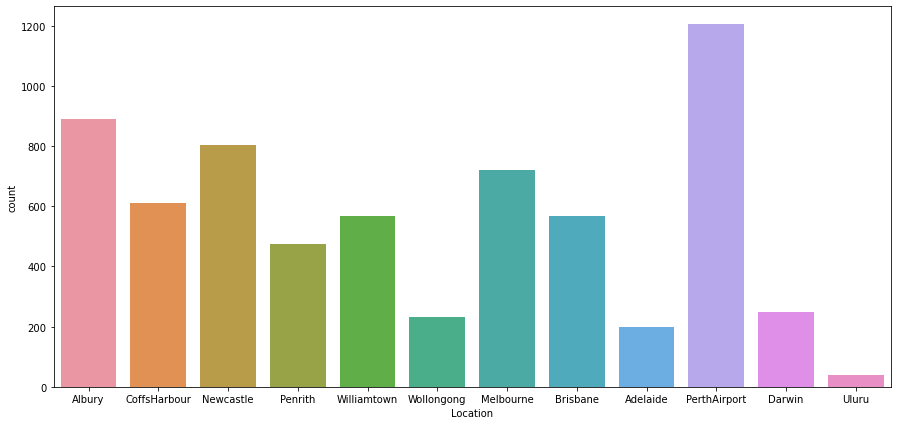

In [429]:
plt.figure(figsize=(15,7))
sns.countplot(data1['Location'])

- More number of observations are taken from Perth Airport location, while very less data is taken from Uluru.

<AxesSubplot:xlabel='MinTemp', ylabel='Count'>

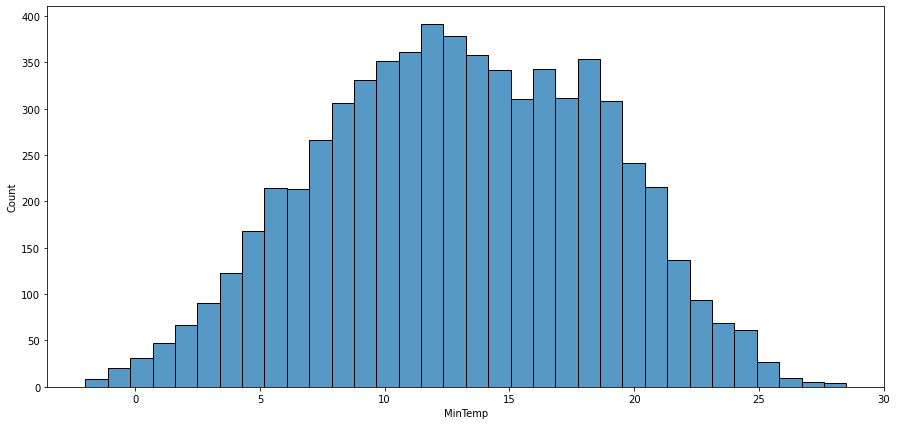

In [430]:
plt.figure(figsize=(15,7))
sns.histplot(data1['MinTemp'])

- The above plot shows mintemp recorded for given locations over the period of time and shows that the avg min temp was raging from 9 to 18 degrees.

<AxesSubplot:xlabel='MaxTemp', ylabel='Count'>

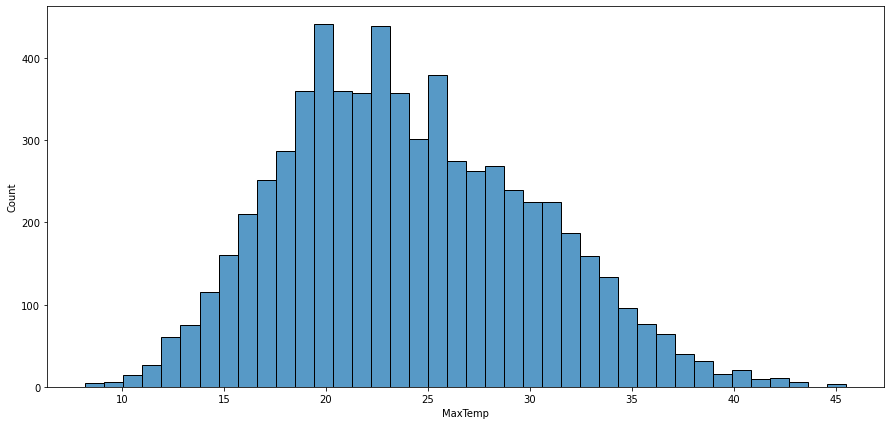

In [339]:
plt.figure(figsize=(15,7))
sns.histplot(data1['MaxTemp'])

The above plot shows maxtemp recorded for given locations over the period of time and shows that the avg max temp was raging from 18 to 30 degrees.

<AxesSubplot:xlabel='Rainfall', ylabel='Date'>

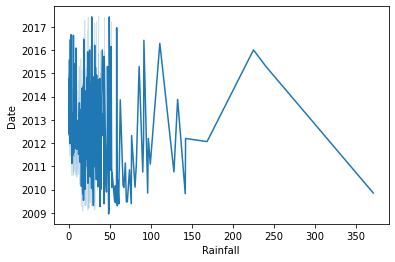

In [302]:
sns.lineplot(data1['Rainfall'],data1['Date'])

- The above plot shows the amount of rainfall in mm over the years. The rainfall is raning from 0-50mm per day, The rainfall was maximum in year 2010 with >350mm per day.

In [36]:
data1['Evaporation'].unique()

array([  2.6,   8.6,   3.8,   6.8,   4.2,   3.2,   4.6,   3.6,   4.8,
         3. ,   3.4,   1.2,   4.4,   1.4,   1. ,   4. ,   8.4,   2.4,
         1.6,   5.4,   2.2,   7. ,   2. ,   1.8,   2.8,   0.2,   0.8,
         5.8,   5. ,   5.2,   6.6,   6.4,   8. ,   6.2,   7.8,   8.8,
         5.6,   7.4,   7.2,   6. ,   0.6,   7.6,  14.6,  11. ,  19.8,
        27.4,  12. ,  23. ,  10. ,   9. ,  10.4,  55.4,  17.8,  33.8,
        10.2,  14.2,  15.2,  15.8,  15.4,  11.4,  14.8,  13.2,  11.6,
         8.2,   0. ,  12.6,   9.6,  16.2,   9.8,  12.2,   0.4,  22.4,
        11.8,  10.6,   9.2,  11.2,   9.4,  15.6,  18. ,  24.2,  19.4,
        10.8,  28. ,  24.6,  22.6,  37. ,  26. ,  24.4,  24. ,  29.2,
        20.6,  22.8,  16. ,  20. ,  18.4,  24.8,  20.8,  32. ,  59.2,
       145. ,  47. ,  13. ,  13.6,  12.8,  12.4,  17.6,  19.2,  13.8,
        18.6,  13.4,  17. ,  14. ,  14.4,  15. ,   0.7])

<AxesSubplot:xlabel='Evaporation'>

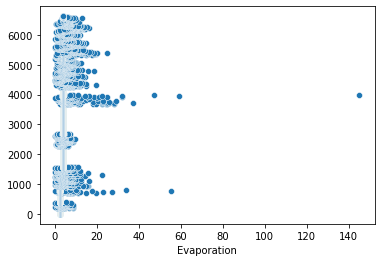

In [37]:
sns.scatterplot(data1['Evaporation'],data1.index)

- The evaporation has been in the range of 0-18mm over the years. Only once evaporation was higher at >140mm.

In [38]:
data1['Sunshine'].unique()

array([ 0. ,  9. ,  3.4,  2.8,  6.4,  7.9,  0.3,  3.5,  1.9,  1.1,  7.8,
        8.8,  1.8,  3.1,  3. ,  9.5,  0.5,  1. ,  4.3,  8.9,  4.5,  2.6,
        9.1,  2.2,  0.4,  0.7,  9.4,  8.5,  3.6,  2.5,  6.9,  5.1,  5.8,
        1.6,  0.6,  4.7,  4.1,  5.3,  8.4,  2.3,  5.2,  6.8, 10.5, 10.3,
        5.7,  9.8,  9.3,  1.5,  9.9,  2.7,  2. ,  8.3,  6. ,  7.5,  6.2,
        6.7, 10.8,  3.7,  7. ,  7.7,  1.2,  4.2, 10.7, 10.2,  7.4,  8. ,
        5. ,  0.8,  8.7,  4.4,  6.5,  0.1,  4.9,  8.1,  3.9,  5.5,  3.3,
        0.2,  4.6, 11.4,  6.3,  4.8,  0.9,  1.3,  7.3,  8.2,  7.1,  3.2,
       12.3,  1.7,  2.9, 11.7, 10.1,  7.2,  4. ,  5.4,  5.9,  6.6, 10. ,
        9.6,  2.4,  6.1,  9.7,  8.6, 12.7,  3.8,  5.6, 11.1, 12.4, 11.9,
       10.6, 11.2, 13.2,  9.2, 10.4, 13. , 11.6,  1.4, 11.3, 11. ,  2.1,
        7.6, 10.9, 11.5, 12.1, 12.5, 12.6, 12.2, 12.9, 13.1, 12. , 13.6,
       11.8, 12.8, 13.4, 13.3, 13.5, 13.8, 13.9, 13.7])

<AxesSubplot:xlabel='Sunshine'>

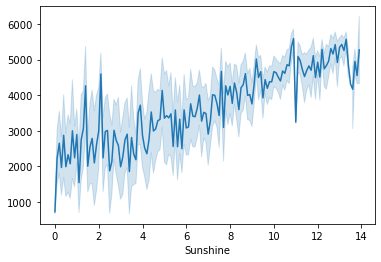

In [39]:
sns.lineplot(data1['Sunshine'],data1.index)

- The sunshine is increasing with respect to years.

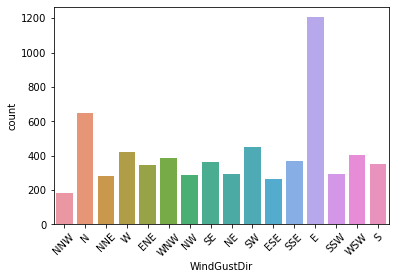

In [40]:
sns.countplot(data1['WindGustDir'])
plt.xticks(rotation=45)
plt.show()

- It can be seen from plot that wind direction was most in East direction.

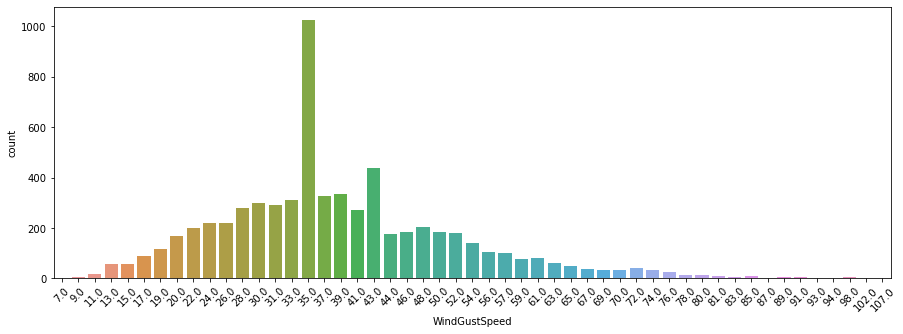

In [41]:
plt.figure(figsize=(15,5))
sns.countplot(data1['WindGustSpeed'])
plt.xticks(rotation=45)
plt.show()

- It can be seen from the plot that average wind gust speed was 28-41. Max wind speed schieved was 107.

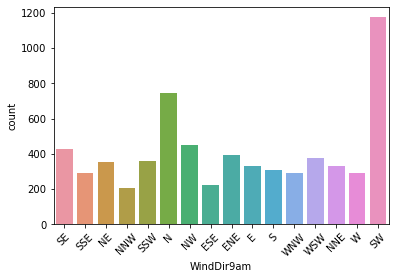

In [42]:
sns.countplot(data1['WindDir9am'])
plt.xticks(rotation=45)
plt.show()

- The above plot suggests that most times the wind direction at 9am was South west. 

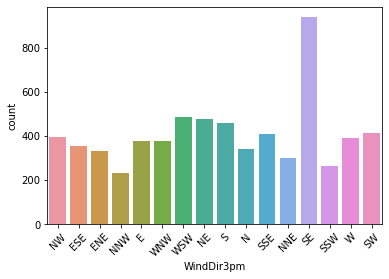

In [43]:
sns.countplot(data1['WindDir3pm'])
plt.xticks(rotation=45)
plt.show()

- It can be seen from the plot that Wind Direction at 3pm at most times was South East.

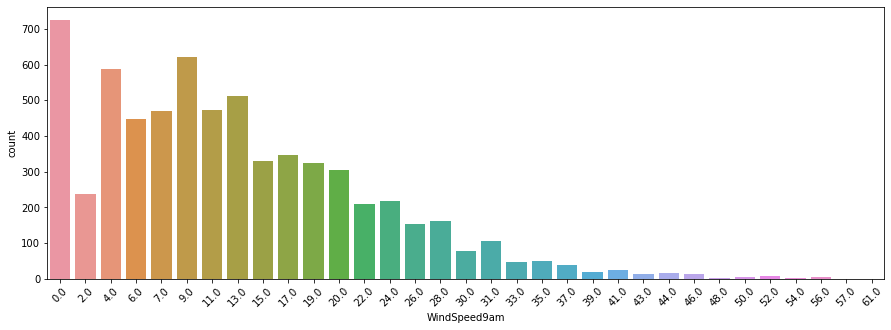

In [44]:
plt.figure(figsize=(15,5))
sns.countplot(data1['WindSpeed9am'])
plt.xticks(rotation=45)
plt.show()

- The highest wind speed at 9am received was at 61 while average wing speed at 9 am is 4-13.

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='count'>

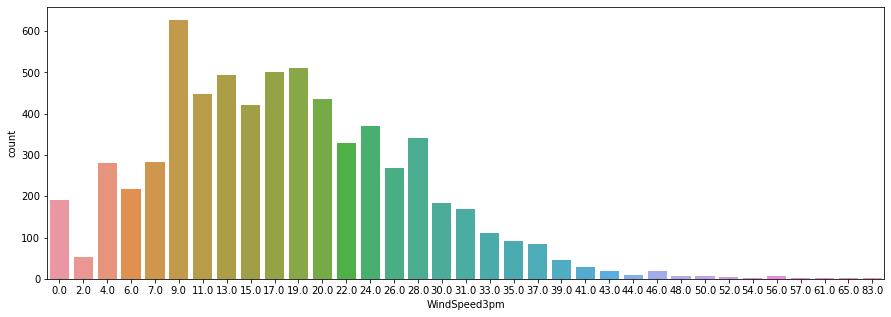

In [45]:
plt.figure(figsize=(15,5))
sns.countplot(data1['WindSpeed3pm'])


- The above plot shows that in most times wing speed at 3pm was at 9

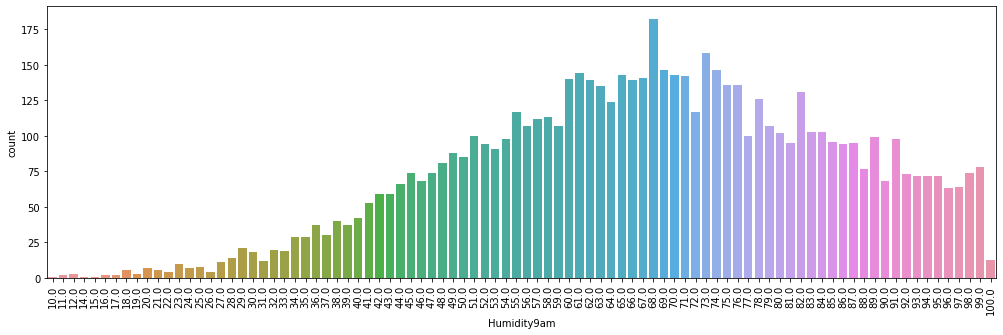

In [46]:
plt.figure(figsize=(17,5))
sns.countplot(data1['Humidity9am'])
plt.xticks(rotation=90)
plt.show()

- The above plot suggests that most times Humidity at 9am was in range of 57-87 while the highest humidity seen at 9am was 100.

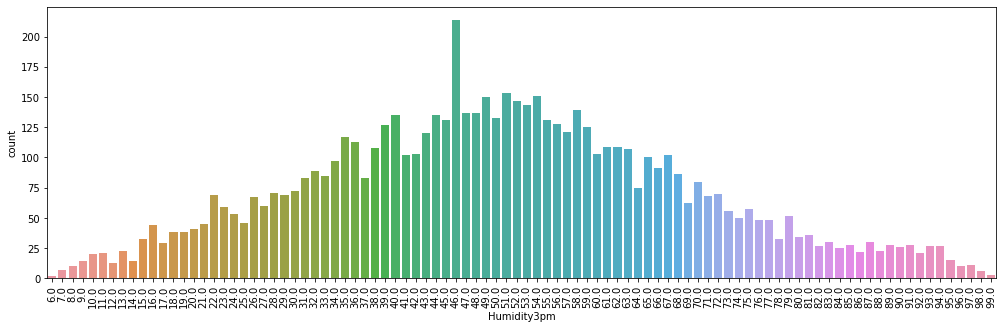

In [47]:
plt.figure(figsize=(17,5))
sns.countplot(data1['Humidity3pm'])
plt.xticks(rotation=90)
plt.show()

- The above plot suggests that most times Humidity at 3pm was in range of 33-68 while the highest humidity seen at 3pm was 99.

In [48]:
data1['Pressure9am'].unique()

array([1008.9, 1011.8, 1010.5,  994.3, 1012.2, 1005.8, 1004.8, 1005.3,
       1017. , 1019.5, 1017.4, 1012.7, 1022.6, 1018.8, 1021.5, 1024.4,
       1004. , 1013.8, 1015. , 1024.6, 1034.1, 1031.9, 1029.3, 1023.5,
       1015.2, 1007.5, 1009.6, 1011.1, 1025.7, 1021.9, 1020.2, 1015.5,
       1007.8, 1011.4, 1007.6, 1006.5, 1009.4, 1006.6, 1009.5, 1019.9,
       1024. , 1025.8, 1021.7, 1012.8, 1009. , 1015.7, 1021.2, 1012. ,
       1011.5, 1004.1, 1016.9, 1002.6, 1014.2, 1018.9, 1016.6, 1014.5,
        997.8, 1009.3, 1005.2, 1014. , 1007.9, 1001.9, 1000.5, 1008.5,
       1010.8, 1006.9, 1016.8, 1009.8, 1009.9, 1015.3, 1008.8, 1010. ,
       1013.3, 1008.7, 1016.4, 1017.9, 1011.6, 1020.5, 1013.4, 1020.9,
       1017.8, 1017.6, 1019.4, 1005.7, 1012.9, 1027.4, 1019.6, 1020.7,
       1027.5, 1024.1, 1009.2, 1023.1, 1027.8, 1013.7, 1016.3, 1022.4,
       1013.9, 1006.2, 1014.4, 1004.5, 1008.2, 1017.7, 1013.2, 1010.9,
       1003.1, 1022.1, 1004.7, 1011.7, 1019.7, 1015.6, 1019.8, 1027.7,
      

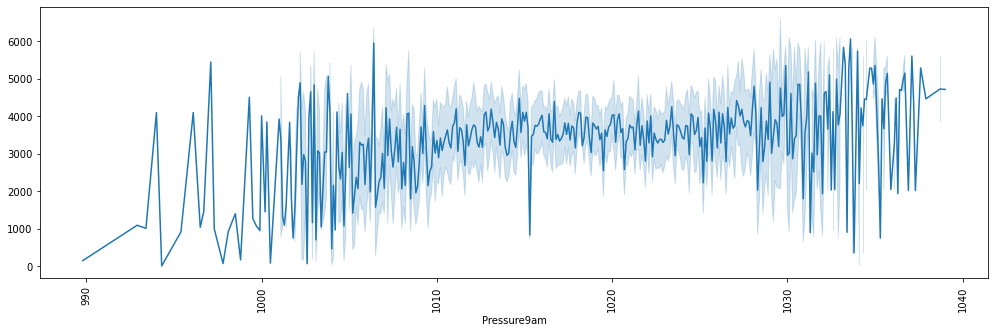

In [49]:
plt.figure(figsize=(17,5))
sns.lineplot(data1['Pressure9am'],data1.index)
plt.xticks(rotation=90)
plt.show()

- The pressure at 9am has been increasing over the years, The average pressure seen in the range of 1010-1020 hpa.

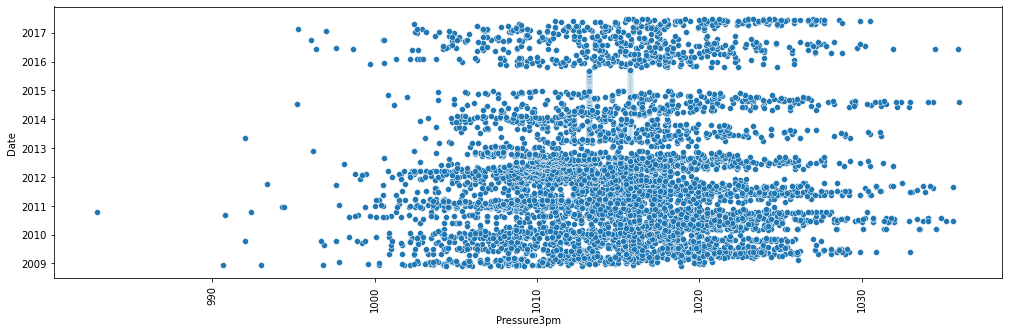

In [50]:
plt.figure(figsize=(17,5))
sns.scatterplot(data1['Pressure3pm'],data1['Date'])
plt.xticks(rotation=90)
plt.show()

-  The average pressure seen is in the range of 1010-1020 hpa.with maximum pressure going high for >1030hpa.

<AxesSubplot:xlabel='Cloud9am', ylabel='count'>

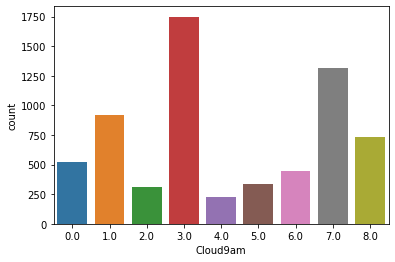

In [51]:
sns.countplot(data1['Cloud9am'])

-The above plot suggests that most times Fraction of sky obscured by cloud at 9am was at value 3.

<AxesSubplot:xlabel='Cloud3pm', ylabel='count'>

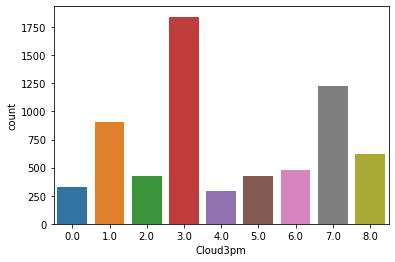

In [52]:
sns.countplot(data1['Cloud3pm'])

- The above plot suggests that most times Fraction of sky obscured by cloud at 3pm was at value 3.

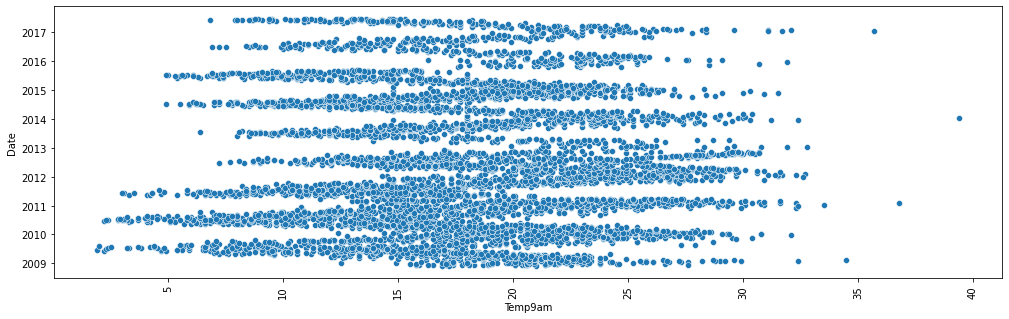

In [53]:
plt.figure(figsize=(17,5))
sns.scatterplot(data1['Temp9am'],data1['Date'])
plt.xticks(rotation=90)
plt.show()


-The average range of temperature at 9am seen over the years is from 10-28 degree celcius.

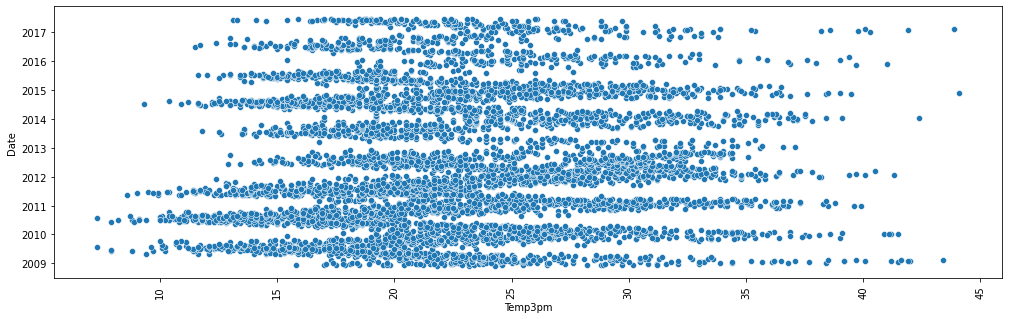

In [54]:
plt.figure(figsize=(17,5))
sns.scatterplot(data1['Temp3pm'],data1['Date'])
plt.xticks(rotation=90)
plt.show()


- The average range of temperature at 3pm seen over the years is from 13-33 degree celcius.

<AxesSubplot:xlabel='RainToday', ylabel='count'>

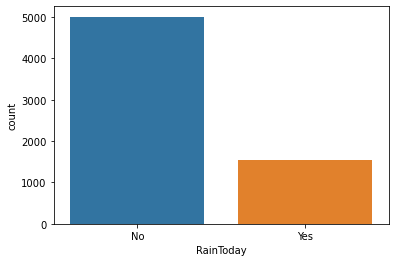

In [55]:
sns.countplot(data1['RainToday'])

- The plot suggests that most of the time it did not rained by keeping all other factors in consideration.

<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

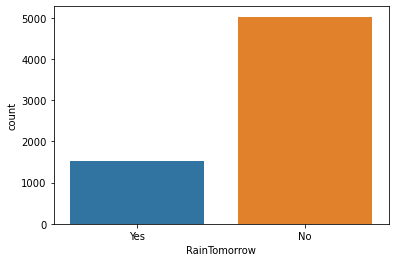

In [56]:
sns.countplot(data1['RainTomorrow'])

- It can be seen from the plot that in most cases it did not rained next day by keeping all the factors in consideration.

**splitting Date column into Day, Month and Year**

In [431]:
data1['day']=data1['Date'].dt.day

In [432]:
data1['month']=data1['Date'].dt.month


In [433]:
data1['year']=data1['Date'].dt.year

In [434]:
data1

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,2008-12-09,Albury,9.7,31.9,0.0,2.6,0.0,NNW,80.0,SE,...,1003.6,7.0,7.0,18.3,30.2,No,Yes,9,12,2008
1,2008-12-11,Albury,13.4,30.4,0.0,2.6,0.0,N,30.0,SSE,...,1008.7,7.0,7.0,20.4,28.8,No,Yes,11,12,2008
2,2008-12-12,Albury,15.9,21.7,2.2,2.6,0.0,NNE,31.0,NE,...,1004.2,8.0,8.0,15.9,17.0,Yes,Yes,12,12,2008
3,2008-12-13,Albury,15.9,18.6,15.6,2.6,0.0,W,61.0,NNW,...,993.0,8.0,8.0,17.4,15.8,Yes,Yes,13,12,2008
4,2008-12-17,Albury,14.1,20.9,0.0,2.6,0.0,ENE,22.0,SSW,...,1010.4,8.0,1.0,17.2,18.1,No,Yes,17,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6619,2017-06-20,Uluru,3.5,21.8,0.0,4.0,11.0,E,31.0,ESE,...,1021.2,3.0,3.0,9.4,20.9,No,No,20,6,2017
6620,2017-06-21,Uluru,2.8,23.4,0.0,4.0,11.0,E,31.0,SE,...,1020.3,3.0,3.0,10.1,22.4,No,No,21,6,2017
6621,2017-06-22,Uluru,3.6,25.3,0.0,4.0,11.0,NNW,22.0,SE,...,1019.1,3.0,3.0,10.9,24.5,No,No,22,6,2017
6622,2017-06-23,Uluru,5.4,26.9,0.0,4.0,11.0,N,37.0,SE,...,1016.8,3.0,3.0,12.5,26.1,No,No,23,6,2017


<AxesSubplot:xlabel='MinTemp', ylabel='RainTomorrow'>

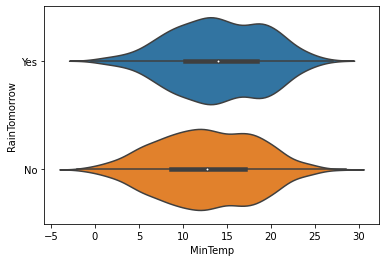

In [61]:
sns.violinplot(x='MinTemp',y='RainTomorrow',data=data1)

- The above plot shows that at what min temp it was predicted it will rain tomorrow or not. 

In [62]:
data1.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'day', 'month', 'year'],
      dtype='object')

<AxesSubplot:xlabel='MaxTemp', ylabel='RainTomorrow'>

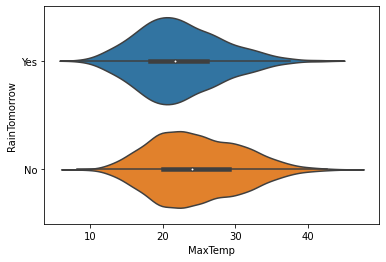

In [63]:
sns.violinplot(x='MaxTemp',y='RainTomorrow',data=data1)

- It can be seen from above plot that it rained next day if average maxTemp was 20 degree.

<AxesSubplot:xlabel='Rainfall', ylabel='RainTomorrow'>

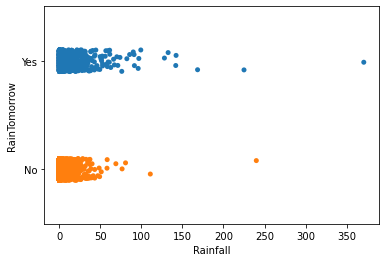

In [64]:
sns.stripplot(x='Rainfall',y='RainTomorrow',data=data1)

- It can be seen from the plot that if rainfall was >50mm today then there will be rainfall tomorrow.

<AxesSubplot:xlabel='Evaporation', ylabel='RainTomorrow'>

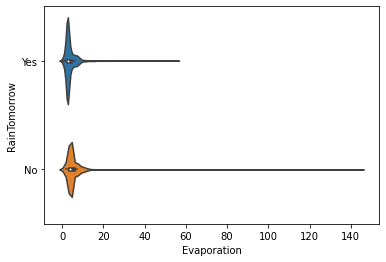

In [65]:
sns.violinplot(x='Evaporation',y='RainTomorrow',data=data1)

- It can be seen from the plot that it rained next day if evaporation was less.

<AxesSubplot:xlabel='Sunshine', ylabel='RainTomorrow'>

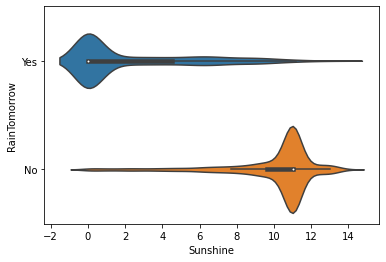

In [66]:
sns.violinplot(x='Sunshine',y='RainTomorrow',data=data1)

- It can be seen from the plot that if there is less sunshine today it will rain tomorrow and vice versa.

<AxesSubplot:xlabel='WindGustSpeed', ylabel='RainTomorrow'>

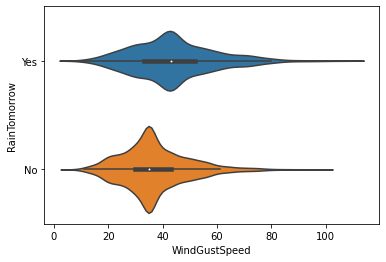

In [68]:
sns.violinplot(x='WindGustSpeed',y='RainTomorrow',data=data1)

- It can be seen from the plot that there will be rain tomorrow if windgustspeed ranges from 20-80 and no rain if wind speed ranges from 20-60.

<AxesSubplot:xlabel='WindSpeed9am', ylabel='RainTomorrow'>

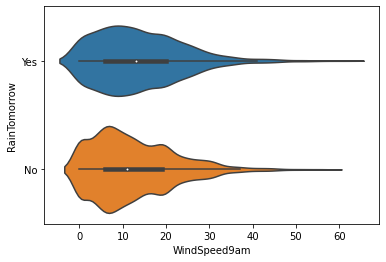

In [71]:
sns.violinplot(x='WindSpeed9am',y='RainTomorrow',data=data1)

- It can be seen from the plot that there will be rain tomorrow if windspeed at 9 am ranges from 0-60 and no rain if wind speed ranges from 0-40.

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='RainTomorrow'>

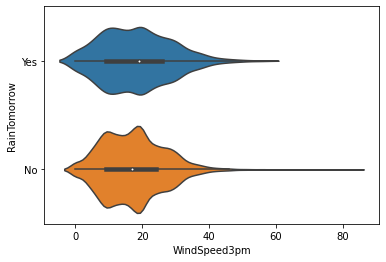

In [72]:
sns.violinplot(x='WindSpeed3pm',y='RainTomorrow',data=data1)

- It can be seen from the plot that there will be rain tomorrow if windspeed at 3pm ranges from 0-60 and no rain if wind speed ranges from 0-40.

<AxesSubplot:xlabel='Humidity9am', ylabel='RainTomorrow'>

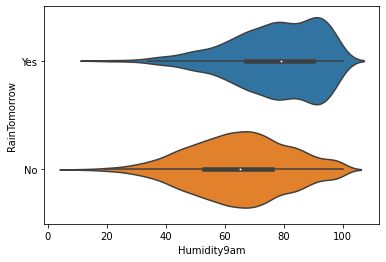

In [73]:
sns.violinplot(x='Humidity9am',y='RainTomorrow',data=data1)

- It will rain tomorrow if humidity at 9am is higher i.e. >80 as seen in plot.

<AxesSubplot:xlabel='Humidity3pm', ylabel='RainTomorrow'>

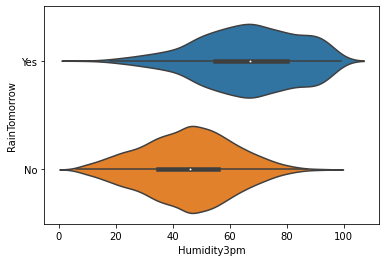

In [74]:
sns.violinplot(x='Humidity3pm',y='RainTomorrow',data=data1)

- It is seen from the plot that if humidity at 3pm ranges from 60-100 then it will rain tomorrow.

<AxesSubplot:xlabel='Pressure9am', ylabel='RainTomorrow'>

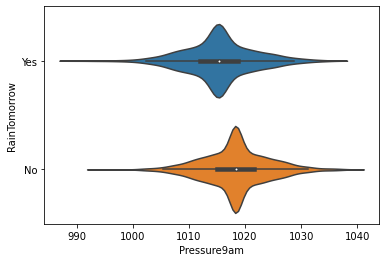

In [75]:
sns.violinplot(x='Pressure9am',y='RainTomorrow',data=data1)

- It is seen that if pressure at 9am ranges from 1000-1030 it will rain tomorrow. if the pressure increases then there wpnt be any rain.

<AxesSubplot:xlabel='Pressure3pm', ylabel='RainTomorrow'>

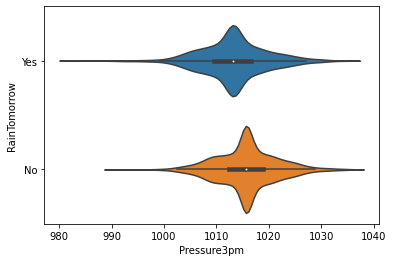

In [76]:
sns.violinplot(x='Pressure3pm',y='RainTomorrow',data=data1)

- There woont be rain tomorro if pressure at 3pm exceeds 1015 hpa and vice versa

<AxesSubplot:xlabel='Cloud9am', ylabel='RainTomorrow'>

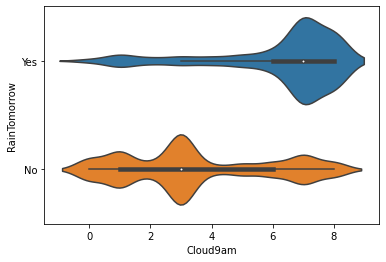

In [77]:
sns.violinplot(x='Cloud9am',y='RainTomorrow',data=data1)

- If there are more clouds at 9am there will be rain next day.

<AxesSubplot:xlabel='Cloud3pm', ylabel='RainTomorrow'>

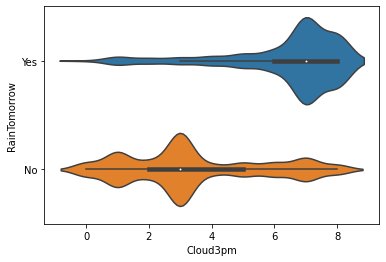

In [78]:
sns.violinplot(x='Cloud3pm',y='RainTomorrow',data=data1)

- If there are more clouds at 3pm there will be rain next day.

<AxesSubplot:xlabel='Temp9am', ylabel='RainTomorrow'>

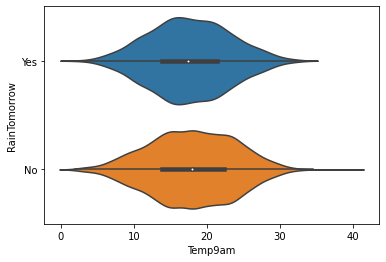

In [79]:
sns.violinplot(x='Temp9am',y='RainTomorrow',data=data1)

Temperature is almost same even if there is rain or not next day.

<AxesSubplot:xlabel='Temp3pm', ylabel='RainTomorrow'>

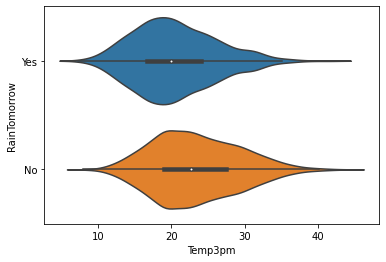

In [80]:
sns.violinplot(x='Temp3pm',y='RainTomorrow',data=data1)

- The plot suggests that, it will rain if temp at 3pm is low and vice versa.

<AxesSubplot:xlabel='RainToday', ylabel='RainTomorrow'>

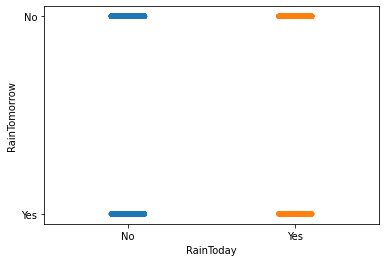

In [81]:
sns.stripplot(x='RainToday',y='RainTomorrow',data=data1)

- No relationship can be established in this plot.

<AxesSubplot:xlabel='Location', ylabel='Rainfall'>

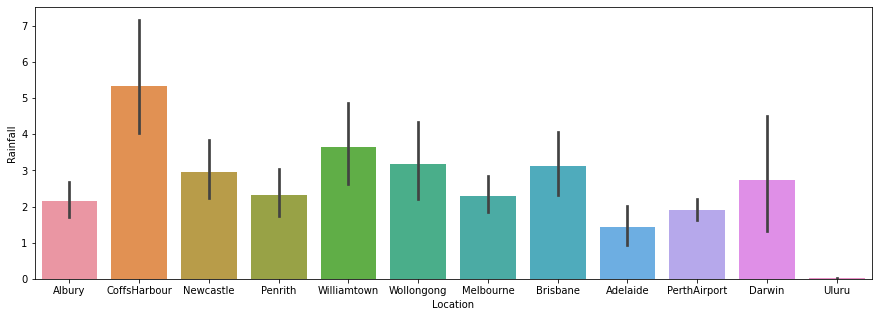

In [82]:
plt.figure(figsize=(15,5))
sns.barplot(x='Location',y='Rainfall',data=data1)

- Rainfall is more seen in CoffsHarbour region and least in Uluru.

<AxesSubplot:xlabel='MinTemp', ylabel='Rainfall'>

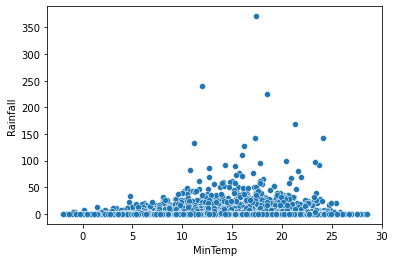

In [83]:
sns.scatterplot(x='MinTemp',y='Rainfall',data=data1)

- There will be rainfall if min temp is within range of 10-20degree.

<AxesSubplot:xlabel='MaxTemp', ylabel='Rainfall'>

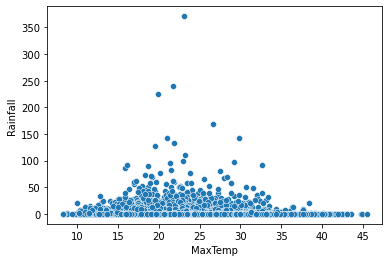

In [84]:
sns.scatterplot(x='MaxTemp',y='Rainfall',data=data1)

- There will be rainfall if max temp is in range of 17-35 degree.

<AxesSubplot:xlabel='Evaporation', ylabel='Rainfall'>

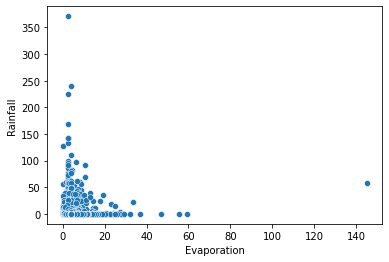

In [85]:
sns.scatterplot(x='Evaporation',y='Rainfall',data=data1)

- The above plot shows rainfall ius higher if evaporation is less

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

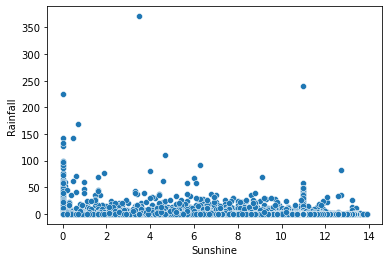

In [86]:
sns.scatterplot(x='Sunshine',y='Rainfall',data=data1)

- the above plot suggests that if sunshine is more then rainfall is less.

<AxesSubplot:xlabel='WindGustDir', ylabel='Rainfall'>

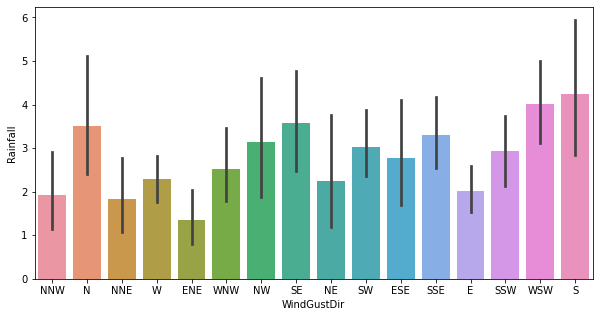

In [87]:
plt.figure(figsize=(10,5))
sns.barplot(x='WindGustDir',y='Rainfall',data=data1)

- The above plot shows that rainfall is higher if wind direvtion is South.

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Rainfall'>

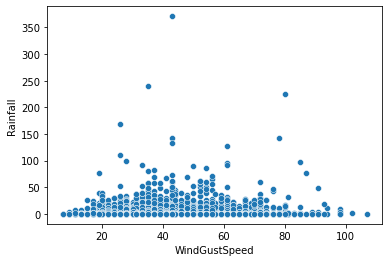

In [88]:
sns.scatterplot(x='WindGustSpeed',y='Rainfall',data=data1)

- The above plot shows that rainfall is higher if wind speed is within range of 30-60.

<AxesSubplot:xlabel='WindDir9am', ylabel='Rainfall'>

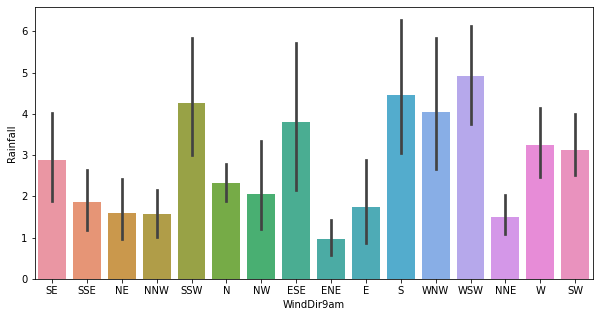

In [89]:
plt.figure(figsize=(10,5))
sns.barplot(x='WindDir9am',y='Rainfall',data=data1)

- Highest rainfall is seen when wind direction at 9am was WSW. Less rainfall is seen in North and North related directions.

<AxesSubplot:xlabel='WindDir3pm', ylabel='Rainfall'>

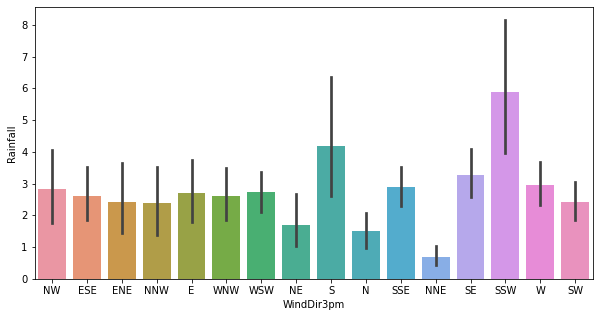

In [90]:
plt.figure(figsize=(10,5))
sns.barplot(x='WindDir3pm',y='Rainfall',data=data1)

- - Highest rainfall is seen when wind direction at 3pm was SSW. Less rainfall is seen in North and North related directions.

<AxesSubplot:xlabel='WindSpeed9am', ylabel='Rainfall'>

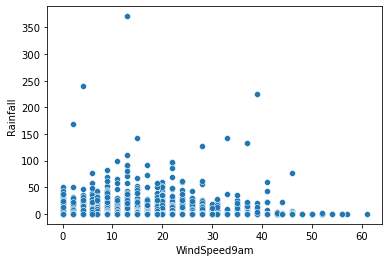

In [91]:
sns.scatterplot(x='WindSpeed9am',y='Rainfall',data=data1)

- Rainfall is highest when windspeed at 9am isin range of 7-21. and as wind speed increases rainfall decreses.

<AxesSubplot:xlabel='WindSpeed3pm', ylabel='Rainfall'>

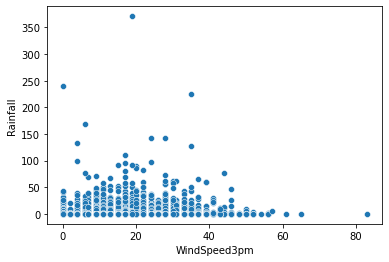

In [92]:
sns.scatterplot(x='WindSpeed3pm',y='Rainfall',data=data1)

Rainfall is highest when windspeed at 3pm isin range of 0-35. and as wind speed increases rainfall decreses and also higher wind speeds are seen at 3pm.

<AxesSubplot:xlabel='Humidity9am', ylabel='Rainfall'>

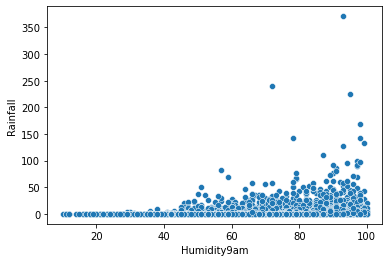

In [93]:
sns.scatterplot(x='Humidity9am',y='Rainfall',data=data1)

- The above plot shows that higher the humidity higher the rainfall.

<AxesSubplot:xlabel='Humidity3pm', ylabel='Rainfall'>

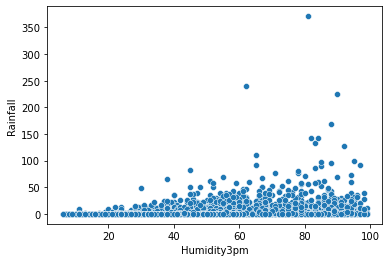

In [94]:
sns.scatterplot(x='Humidity3pm',y='Rainfall',data=data1)

- - The above plot shows that as humidity increases  rainfall increases.

<AxesSubplot:xlabel='Pressure9am', ylabel='Rainfall'>

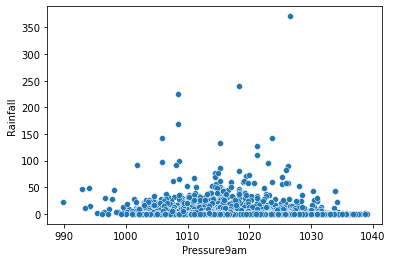

In [95]:
sns.scatterplot(x='Pressure9am',y='Rainfall',data=data1)

- It is seen from the plot that as pressure>1000 hpa the rainfall starts increasing until pressure reached 1030 hpa.

<AxesSubplot:xlabel='Pressure3pm', ylabel='Rainfall'>

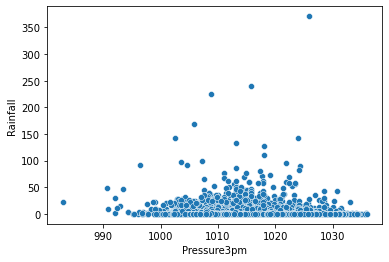

In [96]:
sns.scatterplot(x='Pressure3pm',y='Rainfall',data=data1)

- It is seen from the plot that as pressure>1000 hpa the rainfall starts increasing until pressure reached 1015 hpa.Later if pressure increase rainfall decreses.

<AxesSubplot:xlabel='Cloud9am', ylabel='Rainfall'>

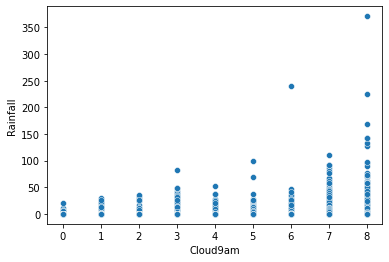

In [97]:
sns.scatterplot(x='Cloud9am',y='Rainfall',data=data1)

- The above plot shows that higher the fraction of clouds covering sky highere will be the rainfall at 9am.

<AxesSubplot:xlabel='Cloud3pm', ylabel='Rainfall'>

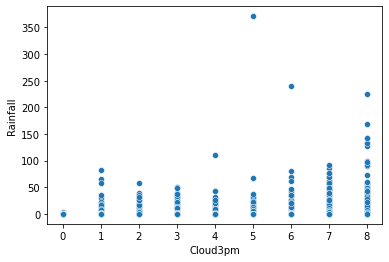

In [675]:
sns.scatterplot(x='Cloud3pm',y='Rainfall',data=data1)

- The above plot shows that higher the fraction of clouds covering sky highere will be the rainfall.

<AxesSubplot:xlabel='Temp9am', ylabel='Rainfall'>

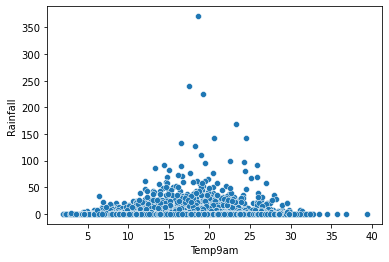

In [99]:
sns.scatterplot(x='Temp9am',y='Rainfall',data=data1)

- The rainfall increases as the temperature increases from 5 degrees to upto 20.Later if temperature increase amount of rainfall also decreses.

<AxesSubplot:xlabel='Temp3pm', ylabel='Rainfall'>

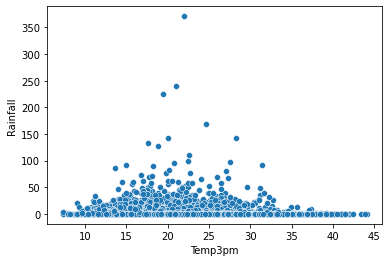

In [100]:
sns.scatterplot(x='Temp3pm',y='Rainfall',data=data1)

- The rainfall increase with increase in temperature of upto 23degrees. It can be seen in plot that if temperature increases afterwards rainfall decreses.

<AxesSubplot:xlabel='RainToday', ylabel='Rainfall'>

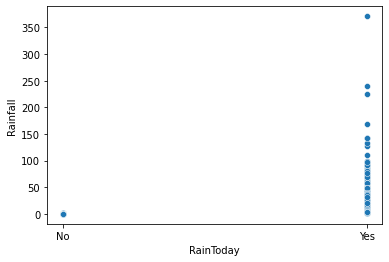

In [101]:
sns.scatterplot(x='RainToday',y='Rainfall',data=data1)

- The plot shows that in most cases if it rained today that means there was rainfall.

<AxesSubplot:xlabel='month', ylabel='Rainfall'>

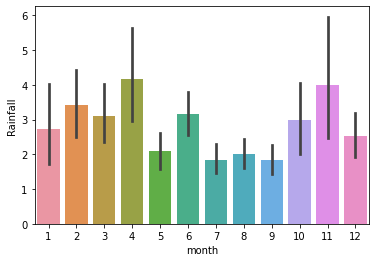

In [103]:
sns.barplot(x='month',y='Rainfall',data=data1)

- The rainfall is highest in month of April and November.

<AxesSubplot:xlabel='year', ylabel='Rainfall'>

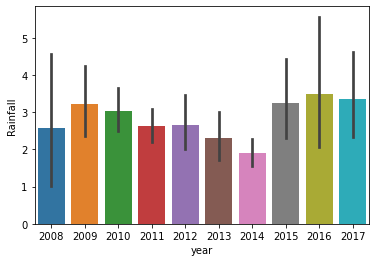

In [104]:
sns.barplot(x='year',y='Rainfall',data=data1)

- The rainfall was highest in the year 2016 and lowest in year 2014.

In [435]:
# Since Date column is divided into Date month and Year seperately, Hence droppimg Date column
data1.drop(['Date'],axis=1,inplace=True)

# Encoding columns using Label Encoder

In [436]:
#importing library for label encoder

from sklearn.preprocessing import LabelEncoder

label_enc=LabelEncoder()


In [437]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6558 entries, 0 to 6623
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       6558 non-null   object 
 1   MinTemp        6558 non-null   float64
 2   MaxTemp        6558 non-null   float64
 3   Rainfall       6558 non-null   float64
 4   Evaporation    6558 non-null   float64
 5   Sunshine       6558 non-null   float64
 6   WindGustDir    6558 non-null   object 
 7   WindGustSpeed  6558 non-null   float64
 8   WindDir9am     6558 non-null   object 
 9   WindDir3pm     6558 non-null   object 
 10  WindSpeed9am   6558 non-null   float64
 11  WindSpeed3pm   6558 non-null   float64
 12  Humidity9am    6558 non-null   float64
 13  Humidity3pm    6558 non-null   float64
 14  Pressure9am    6558 non-null   float64
 15  Pressure3pm    6558 non-null   float64
 16  Cloud9am       6558 non-null   float64
 17  Cloud3pm       6558 non-null   float64
 18  Temp9am 

- There are 5 columns that need to be encoded which are Location, WindGustDir, WindDir9am, WindDir3pm, RainToday and RainTomorrow.

In [438]:
#transforming the data
df1=label_enc.fit_transform(data1['Location'])
df2=label_enc.fit_transform(data1['WindGustDir'])
df3=label_enc.fit_transform(data1['WindDir9am'])
df4=label_enc.fit_transform(data1['WindDir3pm'])
df5=label_enc.fit_transform(data1['RainToday'])
df6=label_enc.fit_transform(data1['RainTomorrow'])

In [439]:
data1['Location']=df1
data1['WindGustDir']=df2
data1['WindDir9am']=df3
data1['WindDir3pm']=df4
data1['RainToday']=df5
data1['RainTomorrow']=df6

In [440]:
data1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,1,9.7,31.9,0.0,2.6,0.0,6,80.0,9,7,...,1003.6,7.0,7.0,18.3,30.2,0,1,9,12,2008
1,1,13.4,30.4,0.0,2.6,0.0,3,30.0,10,2,...,1008.7,7.0,7.0,20.4,28.8,0,1,11,12,2008
2,1,15.9,21.7,2.2,2.6,0.0,5,31.0,4,1,...,1004.2,8.0,8.0,15.9,17.0,1,1,12,12,2008
3,1,15.9,18.6,15.6,2.6,0.0,13,61.0,6,6,...,993.0,8.0,8.0,17.4,15.8,1,1,13,12,2008
4,1,14.1,20.9,0.0,2.6,0.0,1,22.0,11,0,...,1010.4,8.0,1.0,17.2,18.1,0,1,17,12,2008


In [441]:
#Describing dataset
data1.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
count,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,...,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000
mean,5.309698,13.064410,24.072659,2.771134,4.610323,8.153599,6.700976,38.549253,7.829216,7.840500,...,1015.151128,4.139524,4.123056,17.885697,22.665996,0.236810,0.234065,15.755261,6.425435,2012.038579
std,3.101063,5.568278,6.135839,10.599379,3.490634,4.235506,5.139129,13.426610,4.566903,4.490091,...,5.972156,2.625160,2.478447,5.730903,5.982976,0.425157,0.423445,8.796794,3.353119,2.298697
min,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,...,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000,1.000000,1.000000,2008.000000
25%,2.000000,9.000000,19.500000,0.000000,2.800000,5.800000,2.000000,30.000000,3.000000,4.000000,...,1011.600000,2.000000,2.000000,13.825000,18.325000,0.000000,0.000000,8.000000,4.000000,2010.000000
50%,6.000000,13.100000,23.400000,0.000000,4.000000,10.700000,7.000000,35.000000,8.000000,9.000000,...,1015.700000,3.000000,3.000000,18.000000,22.000000,0.000000,0.000000,16.000000,6.000000,2012.000000
75%,8.000000,17.400000,28.400000,0.800000,5.000000,11.000000,12.000000,46.000000,12.000000,12.000000,...,1018.400000,7.000000,7.000000,22.200000,26.800000,0.000000,0.000000,23.000000,9.000000,2014.000000
max,11.000000,28.500000,45.500000,371.000000,145.000000,13.900000,15.000000,107.000000,15.000000,15.000000,...,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000,1.000000,31.000000,12.000000,2017.000000


- The above table provides mean, median and mode of dataset colums. 
- Some of the columns inter quantile range is varying indicating presence of outliers as well as skewness.

**Plotting the correlation matrix to check for correlation**

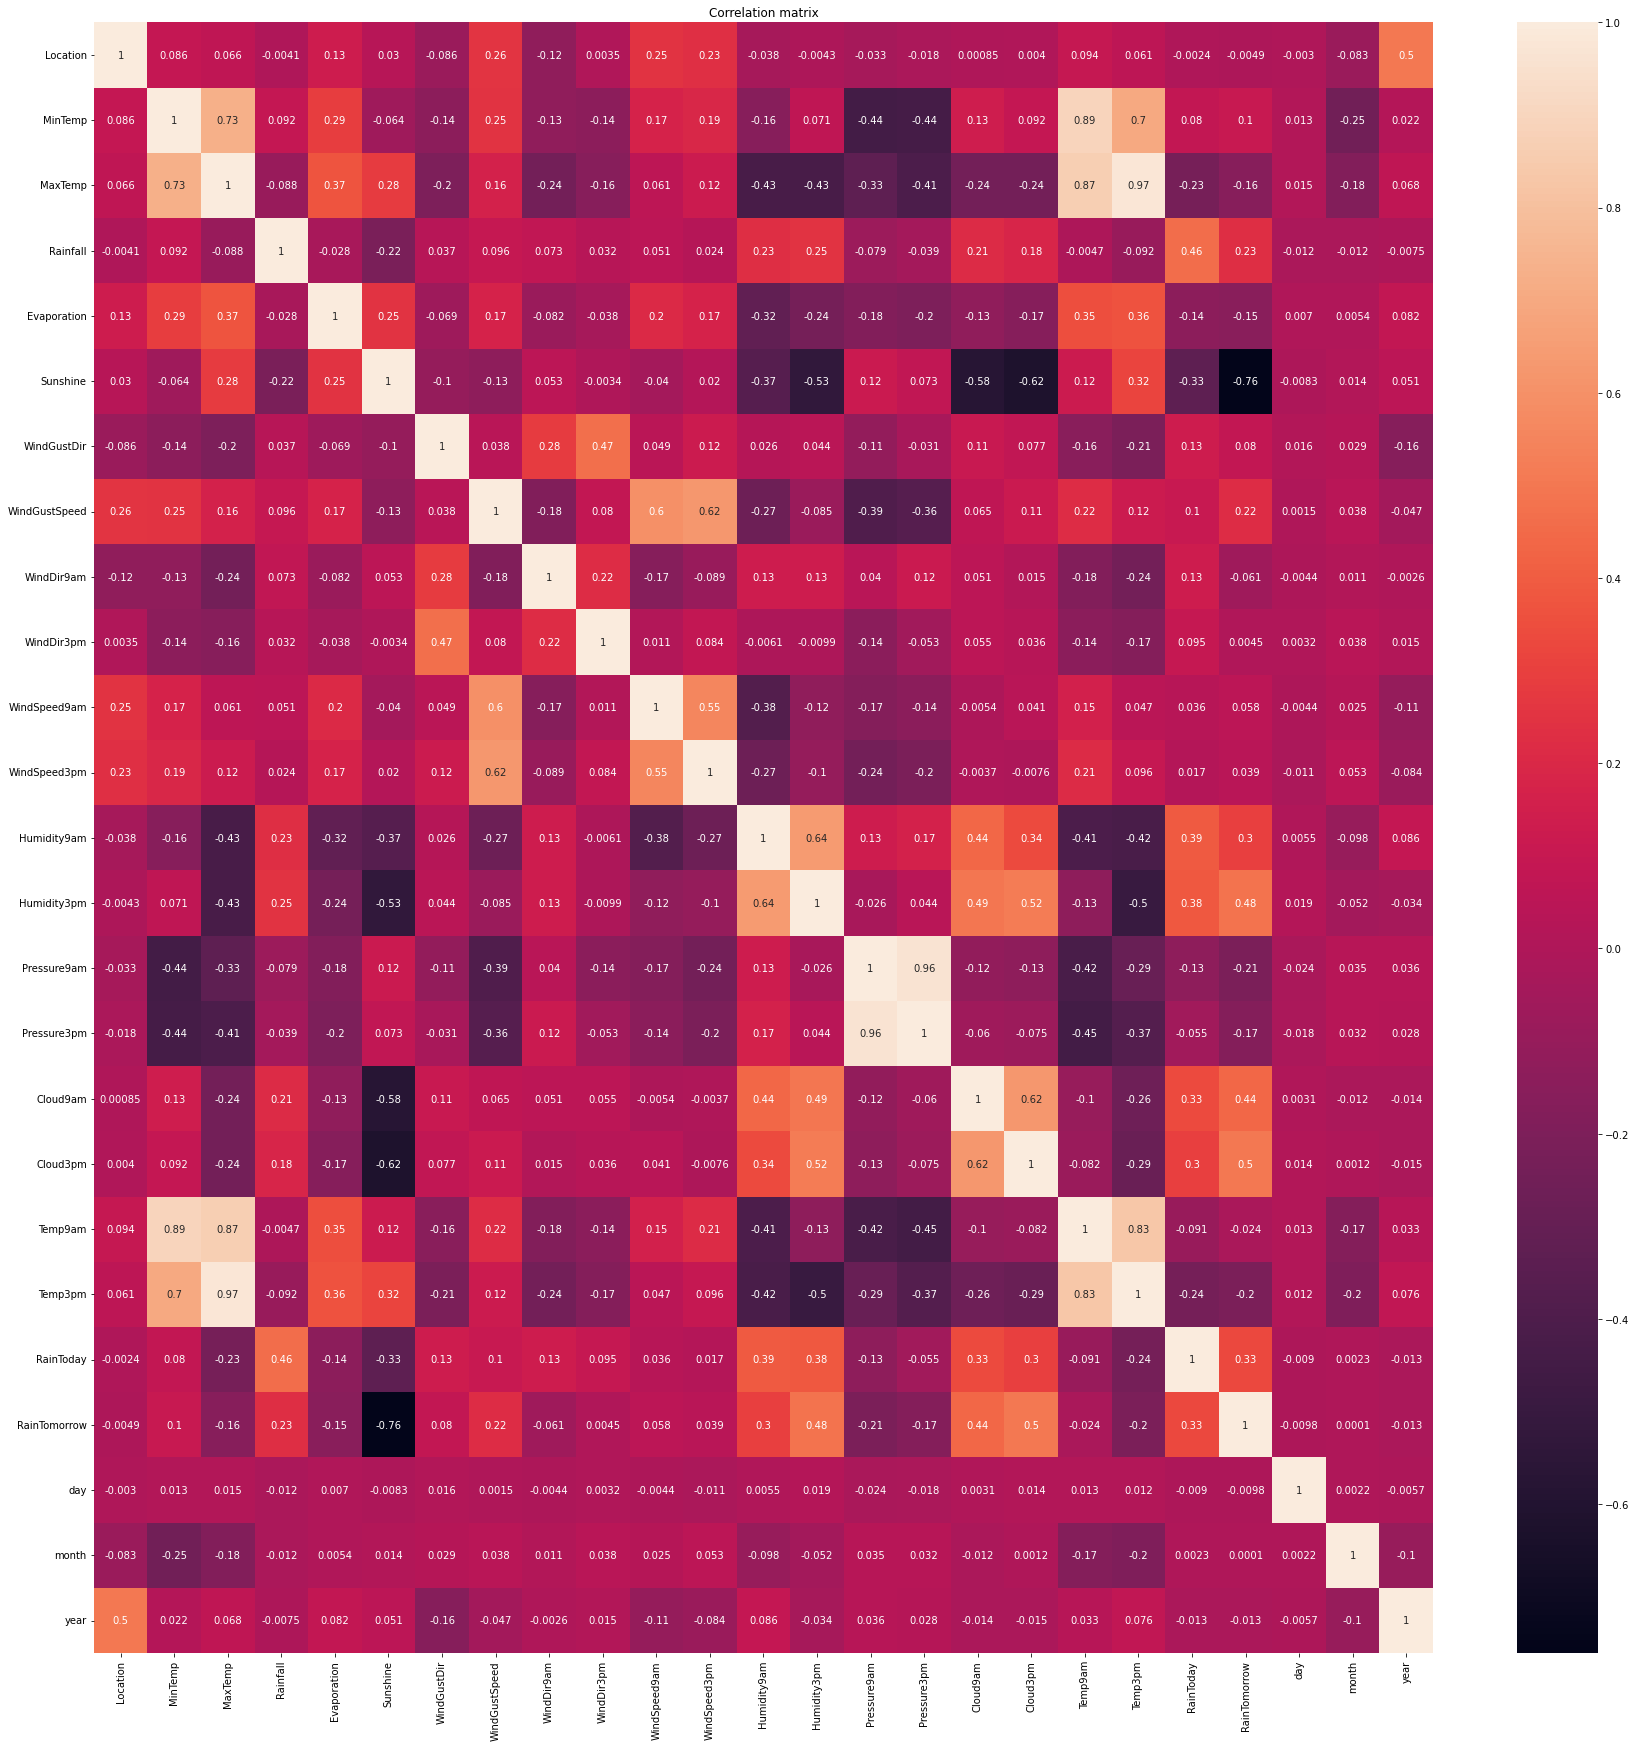

In [112]:
#plotting heatmap

plt.figure(figsize=(30,30))
corr=data1.corr()
sns.heatmap(corr,annot=True)
plt.title('Correlation matrix')
plt.show()

- Note: I take 75% as the minimum limit to say that 2 features shows multicollinearity.
- It is seen that MinTemp and MaxTemp are related to Temp9am.
- Also MaxTemp and Temp9am are related to Temp3pm.
- Sunshine is related to RainTomorrow.
- Pressure9am is related to Pressure3pm.

**PLotting scatterplots to confirm multicollinearity.**

<AxesSubplot:xlabel='MinTemp', ylabel='Temp9am'>

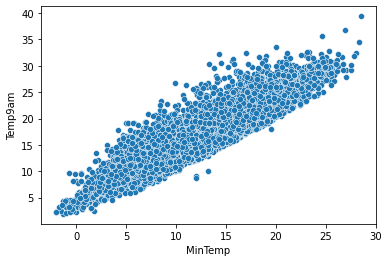

In [113]:
sns.scatterplot(x='MinTemp',y='Temp9am',data=data1)

- MinTemp and Temp9am shows a positive relationship.i.e. as min temp increases temo at 9am increases.

<AxesSubplot:xlabel='MaxTemp', ylabel='Temp9am'>

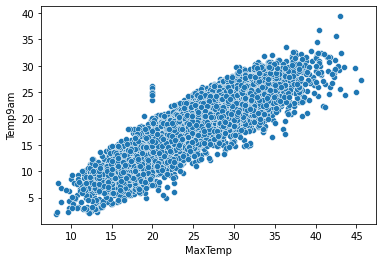

In [114]:
sns.scatterplot(x='MaxTemp',y='Temp9am',data=data1)

-MaxTemp and Temp9am shows a positive relationship.i.e. as max temp increases temp at 9am increases. 

<AxesSubplot:xlabel='MaxTemp', ylabel='Temp3pm'>

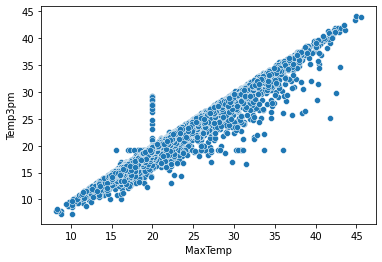

In [115]:
sns.scatterplot(x='MaxTemp',y='Temp3pm',data=data1)

it can be seen from plot that as Max temperature increases Temo at 3pm increases

<AxesSubplot:xlabel='Sunshine', ylabel='RainTomorrow'>

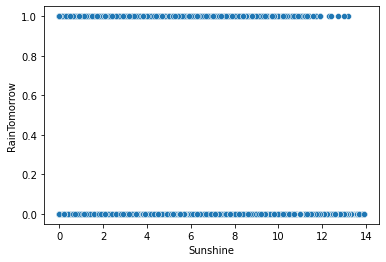

In [116]:
sns.scatterplot(x='Sunshine',y='RainTomorrow',data=data1)

- There is no understandable relaionship seen in above plot.

<AxesSubplot:xlabel='Pressure9am', ylabel='Pressure3pm'>

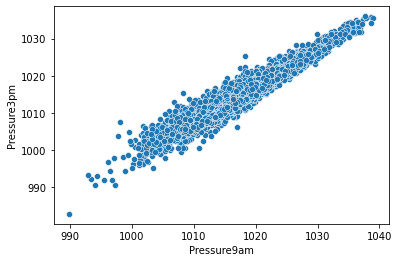

In [117]:
sns.scatterplot(x='Pressure9am',y='Pressure3pm',data=data1)

- If pressure at 9am increases, this increases the pressure at 3pm.

<AxesSubplot:xlabel='Temp9am', ylabel='Temp3pm'>

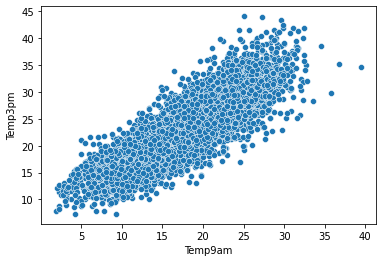

In [118]:
sns.scatterplot(x='Temp9am',y='Temp3pm',data=data1)

- As the tenperature at 9am increases temp at 3pm also increases.

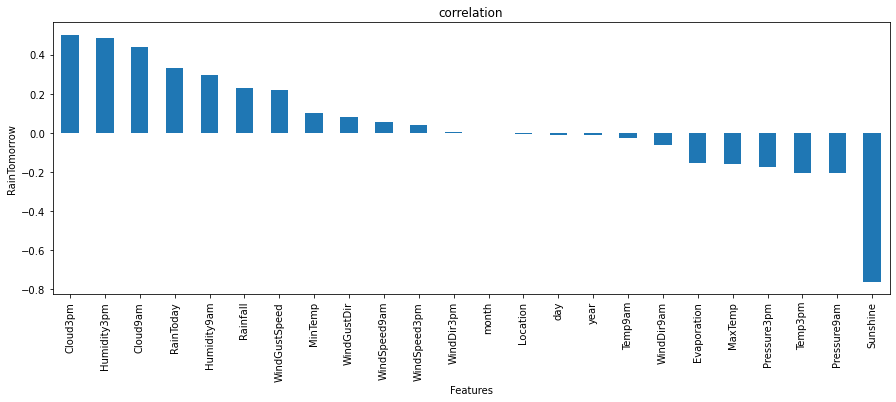

In [121]:
#plotting a coorelation plot that will show relation of features with label(Rain Tomorrow)

plt.figure(figsize=(15,5))
data1.corr()['RainTomorrow'].sort_values(ascending=False).drop(['RainTomorrow']).plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('RainTomorrow')
plt.title('correlation')
plt.show()

# Making Machine Learning Model by taking data1 as dataset and RainTomorrow column as label.

In [125]:
data1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,1,9.7,31.9,0.0,2.6,0.0,6,80.0,9,7,...,1003.6,7.0,7.0,18.3,30.2,0,1,9,12,2008
1,1,13.4,30.4,0.0,2.6,0.0,3,30.0,10,2,...,1008.7,7.0,7.0,20.4,28.8,0,1,11,12,2008
2,1,15.9,21.7,2.2,2.6,0.0,5,31.0,4,1,...,1004.2,8.0,8.0,15.9,17.0,1,1,12,12,2008
3,1,15.9,18.6,15.6,2.6,0.0,13,61.0,6,6,...,993.0,8.0,8.0,17.4,15.8,1,1,13,12,2008
4,1,14.1,20.9,0.0,2.6,0.0,1,22.0,11,0,...,1010.4,8.0,1.0,17.2,18.1,0,1,17,12,2008


In [126]:
data1.shape

(6558, 25)

# Checking for outliers in dataset

In [ ]:
features=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
        'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm','day', 'month', 'year']

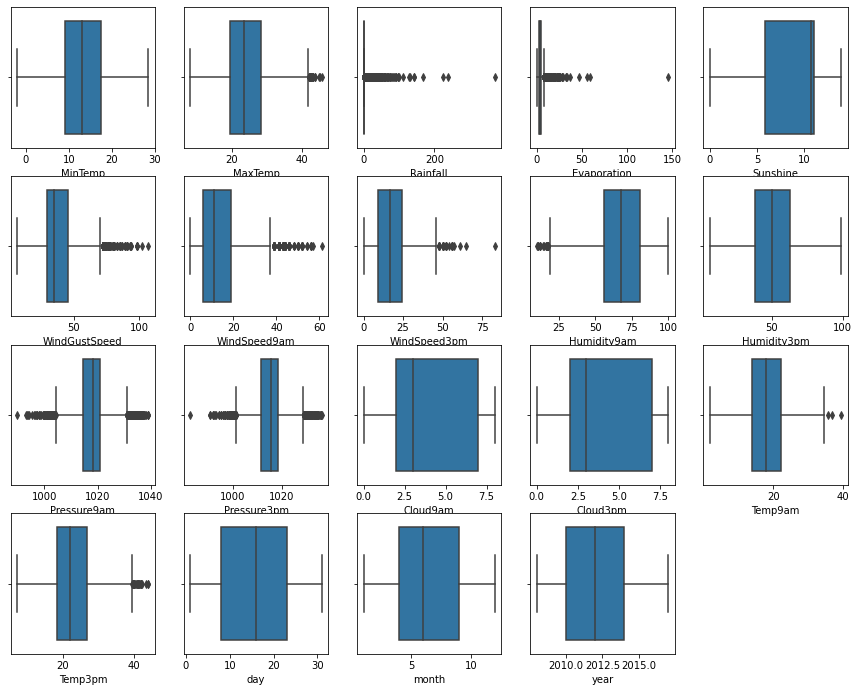

In [133]:
plt.figure(figsize=(15,15))
plotnumber=1

for column in features:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.boxplot(data1[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

- **Outliers are seen in columns MaxTemp, Rainfall, Evaporation,WindGustSpeed,WindSpeed9am, WindSpeed3pm, Humidity9am,Pressure9am, Pressure3pm,Temp9am,Temp3pm.**

**Removing outliers using z square method.**

In [134]:
#importing z score library

from scipy.stats import zscore

In [141]:
z_score=zscore(data1[['MaxTemp', 'Rainfall', 'Evaporation','WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am','Pressure9am'
                     ,'Pressure3pm','Temp9am','Temp3pm']])

In [142]:
abs_z_score=np.abs(z_score)

In [143]:
filtering_entry=(abs_z_score<3).all(axis=1)

In [145]:
data1=data1[filtering_entry]

In [146]:
data1.shape

(6216, 25)

# Data loss after removing outliers

In [147]:
# data loss percentage 
data_loss=((6558-6216)/6216)*100
print(f'data loss in percent after removing outliers is: {data_loss}%')

data loss in percent after removing outliers is: 5.501930501930502%


# Checking for skewness in dataset

In [148]:
data1[features].skew()

MinTemp         -0.064709
MaxTemp          0.276456
Rainfall         3.512366
Evaporation      1.387777
Sunshine        -1.051287
WindGustSpeed    0.555384
WindSpeed9am     0.682925
WindSpeed3pm     0.347580
Humidity9am     -0.232143
Humidity3pm      0.162050
Pressure9am      0.067248
Pressure3pm      0.098106
Cloud9am         0.060414
Cloud3pm         0.135371
Temp9am         -0.070276
Temp3pm          0.306106
day              0.001174
month            0.036580
year             0.353574
dtype: float64

- It can be seen that Rainfall,Evaporation, Sunshine, WindGustSpeed and WindSpeed9am columns have skewness present.

**Confirming that with distplots below.**

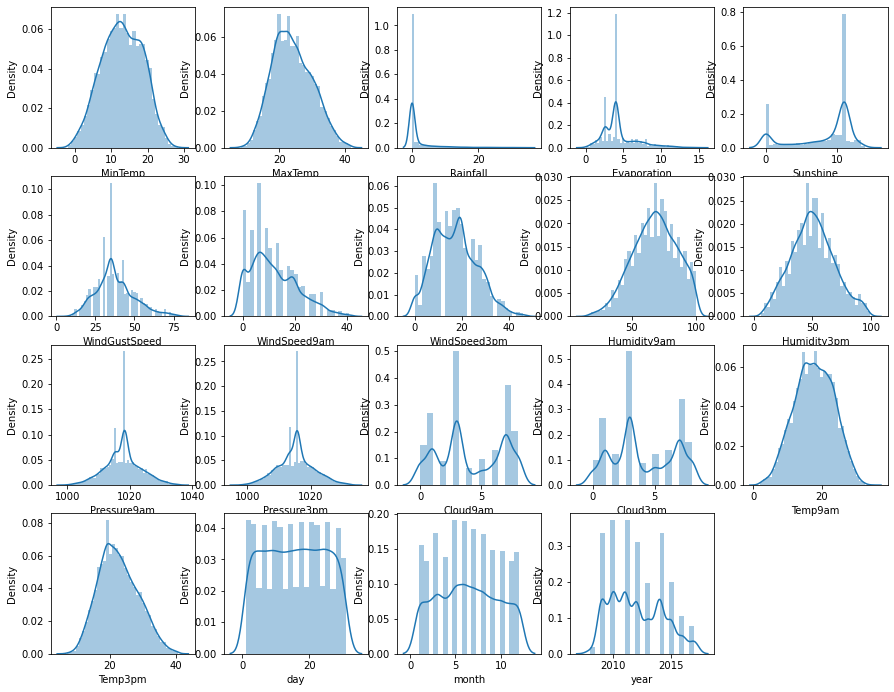

In [150]:
plt.figure(figsize=(15,15))
plotnumber=1

for column in features:
    if plotnumber<=25:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(data1[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

- The only columns that have skewness value >0.5 are Rainfall,Evaporation, Sunshine, WindGustSpeed and WindSpeed9am


# Hence removing skewness using Power Transformer

In [151]:
#importing library
from sklearn.preprocessing import PowerTransformer

scaler=PowerTransformer(method='yeo-johnson') #using yeo-johnson method to transform

In [152]:
skew_col=['Rainfall','Evaporation', 'Sunshine', 'WindGustSpeed','WindSpeed9am']

In [153]:
#transforming the data
data1[skew_col]=scaler.fit_transform(data1[skew_col])

In [154]:
#printing features to check for skewness
data1[skew_col].skew()

Rainfall         1.042250
Evaporation      0.007611
Sunshine        -0.820449
WindGustSpeed    0.005039
WindSpeed9am    -0.133162
dtype: float64

# Using Select KBest feature selection method to find best features to build a model.

In [155]:
from sklearn.feature_selection import SelectKBest,f_classif

In [157]:
data1.shape

(6216, 25)

In [158]:
X=data1.drop(['RainTomorrow'],axis=1)
Y=data1['RainTomorrow']

In [162]:
best_features=SelectKBest(score_func=f_classif,k=19)
fit=best_features.fit(X,Y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)
feature_score=pd.concat([df_columns,df_scores],axis=1)
feature_score.columns=['Feature Name','Score']
print(feature_score.nlargest(19,'Score'))

     Feature Name        Score
5        Sunshine  7523.954419
17       Cloud3pm  1977.027905
13    Humidity3pm  1870.231812
16       Cloud9am  1376.092483
3        Rainfall   816.109441
20      RainToday   673.334803
12    Humidity9am   592.537970
4     Evaporation   440.569269
19        Temp3pm   268.328269
7   WindGustSpeed   235.404201
14    Pressure9am   229.506537
2         MaxTemp   158.139933
15    Pressure3pm   157.345475
1         MinTemp    61.189420
6     WindGustDir    29.771633
8      WindDir9am    28.011758
10   WindSpeed9am     9.526348
18        Temp9am     4.124722
11   WindSpeed3pm     2.566996


In [167]:
x=data1[[ 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday']]

# Scaling the data

In [168]:
#importing data standardizing library

from sklearn.preprocessing import StandardScaler

In [169]:
#Standardizing data
scaler=StandardScaler()

#scaling features

x_scaled=scaler.fit_transform(x)

In [170]:
x_scaled

array([[ 0.07639755,  1.05597551, -0.65481998, ...,  0.45209181,
         1.04749329, -0.54214549],
       [ 0.52543795, -0.38677341,  1.55992758, ..., -0.33773469,
        -0.95992622,  1.84452332],
       [ 0.20212886, -0.51943998, -0.65481998, ..., -0.10956259,
        -0.7727939 , -0.54214549],
       ...,
       [-1.68384084,  0.21022614, -0.65481998, ..., -1.21531969,
         0.31597601, -0.54214549],
       [-1.36053175,  0.47555928, -0.65481998, ..., -0.93449249,
         0.58816849, -0.54214549],
       [-0.92945296,  0.4921426 , -0.65481998, ..., -0.47814829,
         0.57115646, -0.54214549]])

In [171]:
#Checking for value counts in label data

Y.value_counts()

0    4823
1    1393
Name: RainTomorrow, dtype: int64

From above output it can be seen that there are total 2 categories and 1 of them is oversampled.

# Hence applying SMOTE to remove Oversampling

In [172]:
#importing library for SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

sm=SMOTE(0.90)

In [173]:
x_new,y_new=sm.fit_resample(x_scaled,Y)
print('The no. of classes before fit',format(Counter(Y)))
print('The no. of classes after fit',format(Counter(y_new)))

The no. of classes before fit Counter({0: 4823, 1: 1393})
The no. of classes after fit Counter({0: 4823, 1: 4340})


# Model Buiding part

In [175]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [176]:
#saving models in variables

rf=RandomForestClassifier()
ab=AdaBoostClassifier()
dt=DecisionTreeClassifier()
gbdt=GradientBoostingClassifier()

# The scaled features are saved in x_new and label data in y_new.

In [178]:
#finding best random state for model
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=i)
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_train)
    pred=rf.predict(x_test)
    print('training accuracy is ',(accuracy_score(y_train,y_pred)*100),' for random state ',i)
    print('testing accuracy is ',(accuracy_score(y_test,pred)*100),' for random state ',i)
    print('\n')

training accuracy is  100.0  for random state  0
testing accuracy is  93.8018332605849  for random state  0


training accuracy is  100.0  for random state  1
testing accuracy is  93.9764295067656  for random state  1


training accuracy is  100.0  for random state  2
testing accuracy is  94.19467481449149  for random state  2


training accuracy is  100.0  for random state  3
testing accuracy is  94.63116542994325  for random state  3


training accuracy is  100.0  for random state  4
testing accuracy is  95.11130510694021  for random state  4


training accuracy is  99.98544819557625  for random state  5
testing accuracy is  94.80576167612396  for random state  5


training accuracy is  100.0  for random state  6
testing accuracy is  94.76211261457878  for random state  6


training accuracy is  100.0  for random state  7
testing accuracy is  94.3692710606722  for random state  7


training accuracy is  100.0  for random state  8
testing accuracy is  93.9764295067656  for random stat

- Taking random state as 4

In [185]:
#initiating train test split thereafter model training
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.25,random_state=4)

def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('-----Training score-----')
        print(f'Accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%')
    elif train==False:
        pred=clf.predict(x_test)
        print('-----Testing score-----')
        print(f'Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%')
        print('classification report \n',classification_report (y_test,pred))
        print('confusion matrix ',confusion_matrix(y_test,pred))
        print('F1 Score ',f1_score(y_test,pred))

In [186]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [187]:
#passing the function
metric_score(rf,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(rf,x_train,x_test,y_train,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:100.00%
-----Testing score-----
Accuracy score:94.76%
classification report 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      1223
           1       0.93      0.96      0.94      1068

    accuracy                           0.95      2291
   macro avg       0.95      0.95      0.95      2291
weighted avg       0.95      0.95      0.95      2291

confusion matrix  [[1150   73]
 [  47 1021]]
F1 Score  0.944495837187789


In [183]:
#importing library for cross validation score
from sklearn.model_selection import cross_val_score

In [184]:
#finding best value for cv in provided range
for i in range(2,20):
    cv_score=cross_val_score(rf,x_new,y_new,cv=i)
    cv=cv_score.mean()
    print('At cv:-',i)
    print('cross validation score:- ',cv*100)

At cv:- 2
cross validation score:-  86.49927666044374
At cv:- 3
cross validation score:-  91.30181911981853
At cv:- 4
cross validation score:-  90.91977054698563
At cv:- 5
cross validation score:-  92.5238590422554
At cv:- 6
cross validation score:-  92.6220340445569
At cv:- 7
cross validation score:-  92.7862053912474
At cv:- 8
cross validation score:-  92.36047920620042
At cv:- 9
cross validation score:-  93.03669056749526
At cv:- 10
cross validation score:-  93.26671603339159
At cv:- 11
cross validation score:-  92.58976317799845
At cv:- 12
cross validation score:-  93.26596698528587
At cv:- 13
cross validation score:-  93.06956120121013
At cv:- 14
cross validation score:-  93.06889237941832
At cv:- 15
cross validation score:-  93.38576015311281
At cv:- 16
cross validation score:-  93.26661830752145
At cv:- 17
cross validation score:-  93.7902433700753
At cv:- 18
cross validation score:-  93.7025052326104
At cv:- 19
cross validation score:-  93.4740332700776


In [189]:
#cross validation score
print('Cross Validation Score for Random Forest model :- ',((cross_val_score(rf,x_new,y_new,cv=17).mean())*100))

Cross Validation Score for Random Forest model :-  93.67019535086762


# Plotting ROC curve

In [190]:
#importing ROC curve library

from sklearn.metrics import roc_curve,auc

In [191]:
pred=rf.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,pred)
print('fpr',fpr)
print('tpr',tpr)
print('threshold',threshold)

fpr [0.         0.05968929 1.        ]
tpr [0.         0.95599251 1.        ]
threshold [2 1 0]


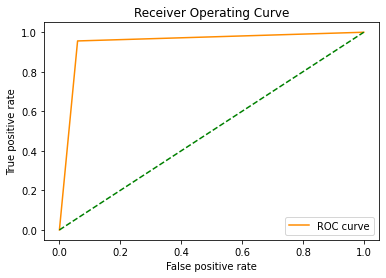

In [192]:
plt.plot(fpr,tpr,color='darkorange',label='ROC curve')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Curve')
plt.legend()
plt.show()

# AdaBoost Model

In [193]:
ab.fit(x_train,y_train)

AdaBoostClassifier()

In [194]:
#passing the function
metric_score(ab,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(ab,x_train,x_test,y_train,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:92.13%
-----Testing score-----
Accuracy score:92.01%
classification report 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      1223
           1       0.90      0.93      0.92      1068

    accuracy                           0.92      2291
   macro avg       0.92      0.92      0.92      2291
weighted avg       0.92      0.92      0.92      2291

confusion matrix  [[1119  104]
 [  79  989]]
F1 Score  0.9153169828782971


In [195]:
#cross validation score
print('Cross Validation Score for AdaBoost model :- ',((cross_val_score(ab,x_new,y_new,cv=17).mean())*100))

Cross Validation Score for AdaBoost model :-  90.24337007530285


# Plotting ROC curve

In [196]:
pred=ab.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,pred)
print('fpr',fpr)
print('tpr',tpr)
print('threshold',threshold)

fpr [0.         0.08503679 1.        ]
tpr [0.         0.92602996 1.        ]
threshold [2 1 0]


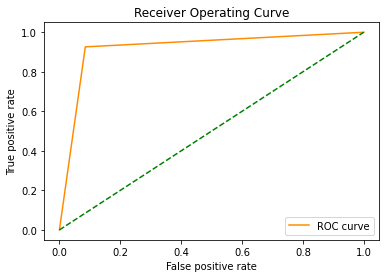

In [197]:
plt.plot(fpr,tpr,color='darkorange',label='ROC curve')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Curve')
plt.legend()
plt.show()

# Decision Tree Model

In [198]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [199]:
#passing the function
metric_score(dt,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(dt,x_train,x_test,y_train,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:100.00%
-----Testing score-----
Accuracy score:91.14%
classification report 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      1223
           1       0.89      0.92      0.91      1068

    accuracy                           0.91      2291
   macro avg       0.91      0.91      0.91      2291
weighted avg       0.91      0.91      0.91      2291

confusion matrix  [[1108  115]
 [  88  980]]
F1 Score  0.9061488673139158


In [200]:
#cross validation score
print('Cross Validation Score for Decision Tree model :- ',((cross_val_score(dt,x_new,y_new,cv=17).mean())*100))

Cross Validation Score for Decision Tree model :-  89.11928407726728


# Plotting ROC curve

In [201]:
pred=dt.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,pred)
print('fpr',fpr)
print('tpr',tpr)
print('threshold',threshold)

fpr [0.         0.09403107 1.        ]
tpr [0.       0.917603 1.      ]
threshold [2 1 0]


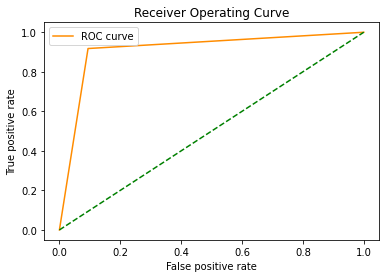

In [202]:
plt.plot(fpr,tpr,color='darkorange',label='ROC curve')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Curve')
plt.legend()
plt.show()

# Gradient Boosting Tees

In [203]:
gbdt.fit(x_train,y_train)

GradientBoostingClassifier()

In [208]:
#passing the function
metric_score(gbdt,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(gbdt,x_train,x_test,y_train,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:94.60%
-----Testing score-----
Accuracy score:93.63%
classification report 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      1223
           1       0.92      0.94      0.93      1068

    accuracy                           0.94      2291
   macro avg       0.94      0.94      0.94      2291
weighted avg       0.94      0.94      0.94      2291

confusion matrix  [[1141   82]
 [  64 1004]]
F1 Score  0.9322191272051996


In [212]:
#cross validation score
print('Cross Validation Score for gradienr boosted tees model :- ',((cross_val_score(gbdt,x_new,y_new,cv=17).mean())*100))

Cross Validation Score for gradienr boosted tees model :-  92.08774418858452


# Plotting ROC curve

In [210]:
pred=gbdt.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,pred)
print('fpr',fpr)
print('tpr',tpr)
print('threshold',threshold)

fpr [0.         0.06704824 1.        ]
tpr [0.         0.94007491 1.        ]
threshold [2 1 0]


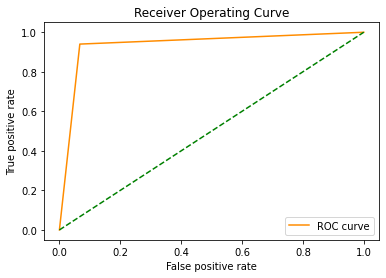

In [211]:
plt.plot(fpr,tpr,color='darkorange',label='ROC curve')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Curve')
plt.legend()
plt.show()

# Dataframe showing training, testing, F1 score and Cross validation scores with respect to different models

In [213]:
column=pd.DataFrame({'Model':['Random Forests','AdaBoost','Decision Trees','Gradient Boosted Tees',],
                    'Training scores':[100,92.13,100,94.60],
                    'Testing scores':[94.76,92.01,91.14,93.63],
                    'Cross validation score':[93.67,90.24,89.11,92.08],
                    'F1 score':[94.44,91.53,90.61,93.22]})
column

,Model,Training scores,Testing scores,Cross validation score,F1 score
0,Random Forests,100.00,94.76,93.67,94.44
1,AdaBoost,92.13,92.01,90.24,91.53
2,Decision Trees,100.00,91.14,89.11,90.61
3,Gradient Boosted Tees,94.60,93.63,92.08,93.22


- Since Random Forests has seen 100% of data and also has good testing accuracy then others with good cross validation scores, according to me this is the best model suitable for hyperparameter tuning.
# Hyperparameter tuning of Random Forest Model.

In [214]:
#importing library for for grid search CV

from sklearn.model_selection import GridSearchCV

In [215]:
grid_param=[{'n_estimators':[10,20,30,40],
           'max_depth':[1,2,3,4,5],
           'criterion':['gini','entropy','log_loss'],
            'min_samples_split':(2,3,4,5),
            'max_features':["sqrt", "log2", None]}]

In [216]:
#saving model in variable
grid=GridSearchCV(RandomForestClassifier(),param_grid=grid_param)

In [217]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy', 'log_loss'],
                          'max_depth': [1, 2, 3, 4, 5],
                          'max_features': ['sqrt', 'log2', None],
                          'min_samples_split': (2, 3, 4, 5),
                          'n_estimators': [10, 20, 30, 40]}])

In [219]:
#best parameters for tuning
grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'min_samples_split': 2,
 'n_estimators': 30}

In [220]:
#using best parameters to train 
rf1=RandomForestClassifier(n_estimators=30,
                           max_depth=5,
                           criterion='gini',
                           min_samples_split=2,
                           max_features=None)

In [221]:
rf1.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, max_features=None, n_estimators=30)

In [222]:
#passing the function
metric_score(rf1,x_train,x_test,y_train,y_test,train=True) #for training data
metric_score(rf1,x_train,x_test,y_train,y_test,train=False) # for testing data

-----Training score-----
Accuracy score:92.45%
-----Testing score-----
Accuracy score:92.32%
classification report 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      1223
           1       0.91      0.93      0.92      1068

    accuracy                           0.92      2291
   macro avg       0.92      0.92      0.92      2291
weighted avg       0.92      0.92      0.92      2291

confusion matrix  [[1120  103]
 [  73  995]]
F1 Score  0.9187442289935365


In [224]:
#cross validation score
print('Cross Validation Score for tuned Random Forest Classifier model :- ',((cross_val_score(rf1,x_new,y_new,cv=13).mean())*100))

Cross Validation Score for tuned Random Forest Classifier model :-  89.6317512274959


In [225]:
pred=rf1.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,pred)
print('fpr',fpr)
print('tpr',tpr)
print('threshold',threshold)

fpr [0.         0.08421913 1.        ]
tpr [0.         0.93164794 1.        ]
threshold [2 1 0]


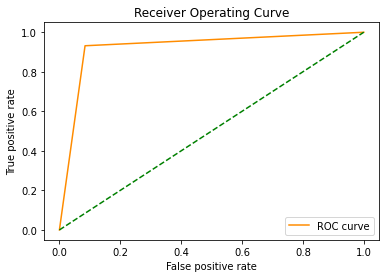

In [226]:
plt.plot(fpr,tpr,color='darkorange',label='ROC curve')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Curve')
plt.legend()
plt.show()

Original random forest model had seen more data with better test score.

# Hence saving original Random Forest model

# Saving the model using pickle

In [227]:
import pickle

In [228]:
pickle.dump(rf,open('Rainfall_tomorrow_rf','wb'))

# Going forward with the 2nd part with df as dataset and Rainfall as label.

In [585]:
#importing dataset

data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [586]:
data.shape

(8425, 23)

In [587]:
data.drop_duplicates(inplace=True)

In [588]:
#dataset shape after removing duplicates

data.shape

(6762, 23)

In [589]:
# checking null values in dataset

data.isnull().sum()

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
dtype: int64

In [590]:
#this will display data that if it will rain tomorrow
data_yes=data.loc[data['RainTomorrow']=='Yes']
data_yes

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
10,2008-12-11,Albury,13.4,30.4,0.0,NaN,NaN,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,NaN,NaN,20.4,28.8,No,Yes
11,2008-12-12,Albury,15.9,21.7,2.2,NaN,NaN,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes
12,2008-12-13,Albury,15.9,18.6,15.6,NaN,NaN,W,61.0,NNW,...,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes,Yes
16,2008-12-17,Albury,14.1,20.9,0.0,NaN,NaN,ENE,22.0,SSW,...,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8371,2012-10-27,Darwin,25.2,34.1,0.0,7.6,10.2,NW,37.0,WSW,...,72.0,61.0,1010.5,1006.5,5.0,3.0,29.9,32.1,No,Yes
8372,2012-10-28,Darwin,22.9,32.8,5.8,7.4,4.4,N,57.0,N,...,96.0,61.0,1012.1,1007.4,8.0,5.0,23.4,32.0,Yes,Yes
8377,2012-11-02,Darwin,25.6,34.1,1.0,7.6,11.3,N,35.0,NNE,...,71.0,55.0,1011.2,1006.9,4.0,3.0,29.2,33.1,No,Yes
8380,2012-11-05,Darwin,25.8,32.9,0.0,7.6,6.7,N,31.0,N,...,70.0,65.0,1010.2,1006.7,5.0,2.0,30.7,32.0,No,Yes


In [591]:
#this will display data if there is no rain tomorrow
data_no=data.loc[data['RainTomorrow']=='No']
data_no

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [592]:
#Filling nan values in columns in below way:
#data_no will input mode/median values of that particular column if there will be no rain tomorrow
#data_yes will input mode/median values of that particular column if there will be rain tomorrow

data_no['MinTemp']=data['MinTemp'].fillna(data_no['MinTemp'].mode()[0])
data_yes['MinTemp']=data['MinTemp'].fillna(data_yes['MinTemp'].mode()[0])

data_no['MaxTemp']=data['MaxTemp'].fillna(data_no['MaxTemp'].mode()[0])
data_yes['MaxTemp']=data_yes['MaxTemp'].fillna(data_yes['MaxTemp'].mode()[0])

data_no['Rainfall']=data['Rainfall'].fillna(data_no['Rainfall'].median())
data_yes['Rainfall']=data_yes['Rainfall'].fillna(data_yes['Rainfall'].median())

data_no['Evaporation']=data['Evaporation'].fillna(data_no['Evaporation'].mode()[0])
data_yes['Evaporation']=data_yes['Evaporation'].fillna(data_yes['Evaporation'].mode()[0])

data_no['Sunshine']=data['Sunshine'].fillna(data_no['Sunshine'].mode()[0])
data_yes['Sunshine']=data_yes['Sunshine'].fillna(data_yes['Sunshine'].mode()[0])

data_no['WindGustDir']=data['WindGustDir'].fillna(data_no['WindGustDir'].mode()[0])
data_yes['WindGustDir']=data_yes['WindGustDir'].fillna(data_yes['WindGustDir'].mode()[0])

data_no['WindGustSpeed']=data['WindGustSpeed'].fillna(data_no['WindGustSpeed'].median())
data_yes['WindGustSpeed']=data_yes['WindGustSpeed'].fillna(data_yes['WindGustSpeed'].median())

data_no['WindDir9am']=data['WindDir9am'].fillna(data_no['WindDir9am'].mode()[0])
data_yes['WindDir9am']=data_yes['WindDir9am'].fillna(data_yes['WindDir9am'].mode()[0])

data_no['WindDir3pm']=data['WindDir3pm'].fillna(data_no['WindDir3pm'].mode()[0])
data_yes['WindDir3pm']=data_yes['WindDir3pm'].fillna(data_yes['WindDir3pm'].mode()[0])

data_no['WindSpeed9am']=data['WindSpeed9am'].fillna(data_no['WindSpeed9am'].median())
data_yes['WindSpeed9am']=data_yes['WindSpeed9am'].fillna(data_yes['WindSpeed9am'].median())

data_no['WindSpeed3pm']=data['WindSpeed3pm'].fillna(data_no['WindSpeed3pm'].median())
data_yes['WindSpeed3pm']=data_yes['WindSpeed3pm'].fillna(data_yes['WindSpeed3pm'].median())

data_no['Humidity9am']=data['Humidity9am'].fillna(data_no['Humidity9am'].mode()[0])
data_yes['Humidity9am']=data_yes['Humidity9am'].fillna(data_yes['Humidity9am'].mode()[0])

data_no['Humidity3pm']=data['Humidity3pm'].fillna(data_no['Humidity3pm'].median())
data_yes['Humidity3pm']=data_yes['Humidity3pm'].fillna(data_yes['Humidity3pm'].median())

data_no['Pressure9am']=data['Pressure9am'].fillna(data_no['Pressure9am'].median())
data_yes['Pressure9am']=data_yes['Pressure9am'].fillna(data_yes['Pressure9am'].median())

data_no['Pressure3pm']=data['Pressure3pm'].fillna(data_no['Pressure3pm'].median())
data_yes['Pressure3pm']=data_yes['Pressure3pm'].fillna(data_yes['Pressure3pm'].median())

data_no['Cloud9am']=data['Cloud9am'].fillna(data_no['Cloud9am'].median())
data_yes['Cloud9am']=data_yes['Cloud9am'].fillna(data_yes['Cloud9am'].median())

data_no['Cloud3pm']=data['Cloud3pm'].fillna(data_no['Cloud3pm'].median())
data_yes['Cloud3pm']=data_yes['Cloud3pm'].fillna(data_yes['Cloud3pm'].median())

data_no['Temp9am']=data['Temp9am'].fillna(data_no['Temp9am'].mode()[0])
data_yes['Temp9am']=data_yes['Temp9am'].fillna(data_yes['Temp9am'].mode()[0])

data_no['Temp3pm']=data['Temp3pm'].fillna(data_no['Temp3pm'].mode()[0])
data_yes['Temp3pm']=data_yes['Temp3pm'].fillna(data_yes['Temp3pm'].mode()[0])

In [593]:
#transferring all the data into new dataframe named data1
df= data_yes.append(data_no, ignore_index=True)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-09,Albury,9.7,31.9,0.0,2.6,0.0,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,7.0,7.0,18.3,30.2,No,Yes
1,2008-12-11,Albury,13.4,30.4,0.0,2.6,0.0,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,7.0,7.0,20.4,28.8,No,Yes
2,2008-12-12,Albury,15.9,21.7,2.2,2.6,0.0,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes
3,2008-12-13,Albury,15.9,18.6,15.6,2.6,0.0,W,61.0,NNW,...,76.0,93.0,994.3,993.0,8.0,8.0,17.4,15.8,Yes,Yes
4,2008-12-17,Albury,14.1,20.9,0.0,2.6,0.0,ENE,22.0,SSW,...,69.0,82.0,1012.2,1010.4,8.0,1.0,17.2,18.1,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6619,2017-06-20,Uluru,3.5,21.8,0.0,4.0,11.0,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,3.0,3.0,9.4,20.9,No,No
6620,2017-06-21,Uluru,2.8,23.4,0.0,4.0,11.0,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,3.0,3.0,10.1,22.4,No,No
6621,2017-06-22,Uluru,3.6,25.3,0.0,4.0,11.0,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,3.0,3.0,10.9,24.5,No,No
6622,2017-06-23,Uluru,5.4,26.9,0.0,4.0,11.0,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,3.0,3.0,12.5,26.1,No,No


In [594]:
# droppu=ing rows containing null values
df.dropna(axis=0,inplace=True)

In [595]:
df.shape

(6558, 23)

In [596]:
df['Date']=pd.to_datetime(df['Date'])

In [597]:
df['Date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 6558 entries, 0 to 6623
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
6558 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 102.5 KB


**splitting Date column into Day, Month and Year**

In [598]:
df['day']=df['Date'].dt.day
df['month']=df['Date'].dt.month
df['year']=df['Date'].dt.year
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,2008-12-09,Albury,9.7,31.9,0.0,2.6,0.0,NNW,80.0,SE,...,1003.6,7.0,7.0,18.3,30.2,No,Yes,9,12,2008
1,2008-12-11,Albury,13.4,30.4,0.0,2.6,0.0,N,30.0,SSE,...,1008.7,7.0,7.0,20.4,28.8,No,Yes,11,12,2008
2,2008-12-12,Albury,15.9,21.7,2.2,2.6,0.0,NNE,31.0,NE,...,1004.2,8.0,8.0,15.9,17.0,Yes,Yes,12,12,2008
3,2008-12-13,Albury,15.9,18.6,15.6,2.6,0.0,W,61.0,NNW,...,993.0,8.0,8.0,17.4,15.8,Yes,Yes,13,12,2008
4,2008-12-17,Albury,14.1,20.9,0.0,2.6,0.0,ENE,22.0,SSW,...,1010.4,8.0,1.0,17.2,18.1,No,Yes,17,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6619,2017-06-20,Uluru,3.5,21.8,0.0,4.0,11.0,E,31.0,ESE,...,1021.2,3.0,3.0,9.4,20.9,No,No,20,6,2017
6620,2017-06-21,Uluru,2.8,23.4,0.0,4.0,11.0,E,31.0,SE,...,1020.3,3.0,3.0,10.1,22.4,No,No,21,6,2017
6621,2017-06-22,Uluru,3.6,25.3,0.0,4.0,11.0,NNW,22.0,SE,...,1019.1,3.0,3.0,10.9,24.5,No,No,22,6,2017
6622,2017-06-23,Uluru,5.4,26.9,0.0,4.0,11.0,N,37.0,SE,...,1016.8,3.0,3.0,12.5,26.1,No,No,23,6,2017


In [599]:
# Since Date column is divided into Date month and Year seperately, Hence droppimg Date column
df.drop(['Date'],axis=1,inplace=True)

# Encoding columns using Label Encoder

In [600]:
label_enc=LabelEncoder()

In [601]:

#transforming the data
df1=label_enc.fit_transform(df['Location'])
df2=label_enc.fit_transform(df['WindGustDir'])
df3=label_enc.fit_transform(df['WindDir9am'])
df4=label_enc.fit_transform(df['WindDir3pm'])
df5=label_enc.fit_transform(df['RainToday'])
df6=label_enc.fit_transform(df['RainTomorrow'])


In [602]:
df['Location']=df1
df['WindGustDir']=df2
df['WindDir9am']=df3
df['WindDir3pm']=df4
df['RainToday']=df5
df['RainTomorrow']=df6

In [603]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,1,9.7,31.9,0.0,2.6,0.0,6,80.0,9,7,...,1003.6,7.0,7.0,18.3,30.2,0,1,9,12,2008
1,1,13.4,30.4,0.0,2.6,0.0,3,30.0,10,2,...,1008.7,7.0,7.0,20.4,28.8,0,1,11,12,2008
2,1,15.9,21.7,2.2,2.6,0.0,5,31.0,4,1,...,1004.2,8.0,8.0,15.9,17.0,1,1,12,12,2008
3,1,15.9,18.6,15.6,2.6,0.0,13,61.0,6,6,...,993.0,8.0,8.0,17.4,15.8,1,1,13,12,2008
4,1,14.1,20.9,0.0,2.6,0.0,1,22.0,11,0,...,1010.4,8.0,1.0,17.2,18.1,0,1,17,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6619,9,3.5,21.8,0.0,4.0,11.0,0,31.0,2,0,...,1021.2,3.0,3.0,9.4,20.9,0,0,20,6,2017
6620,9,2.8,23.4,0.0,4.0,11.0,0,31.0,9,1,...,1020.3,3.0,3.0,10.1,22.4,0,0,21,6,2017
6621,9,3.6,25.3,0.0,4.0,11.0,6,22.0,9,3,...,1019.1,3.0,3.0,10.9,24.5,0,0,22,6,2017
6622,9,5.4,26.9,0.0,4.0,11.0,3,37.0,9,14,...,1016.8,3.0,3.0,12.5,26.1,0,0,23,6,2017


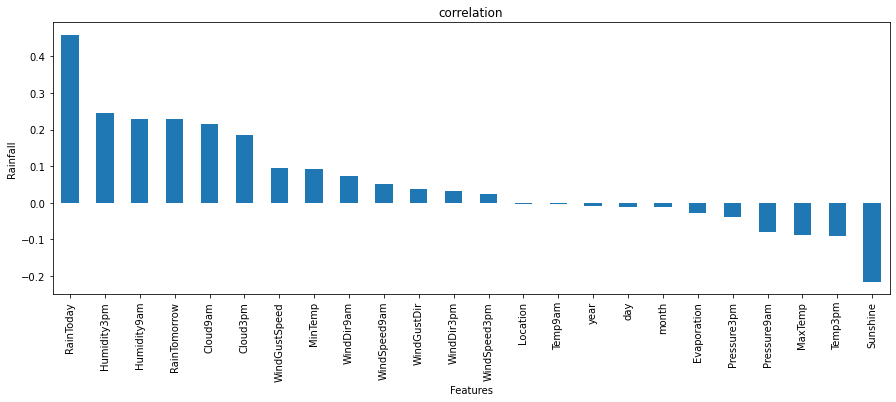

In [604]:
#plotting a coorelation plot that will show relation of features with label(Price range)

plt.figure(figsize=(15,5))
df.corr()['Rainfall'].sort_values(ascending=False).drop(['Rainfall']).plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Rainfall')
plt.title('correlation')
plt.show()

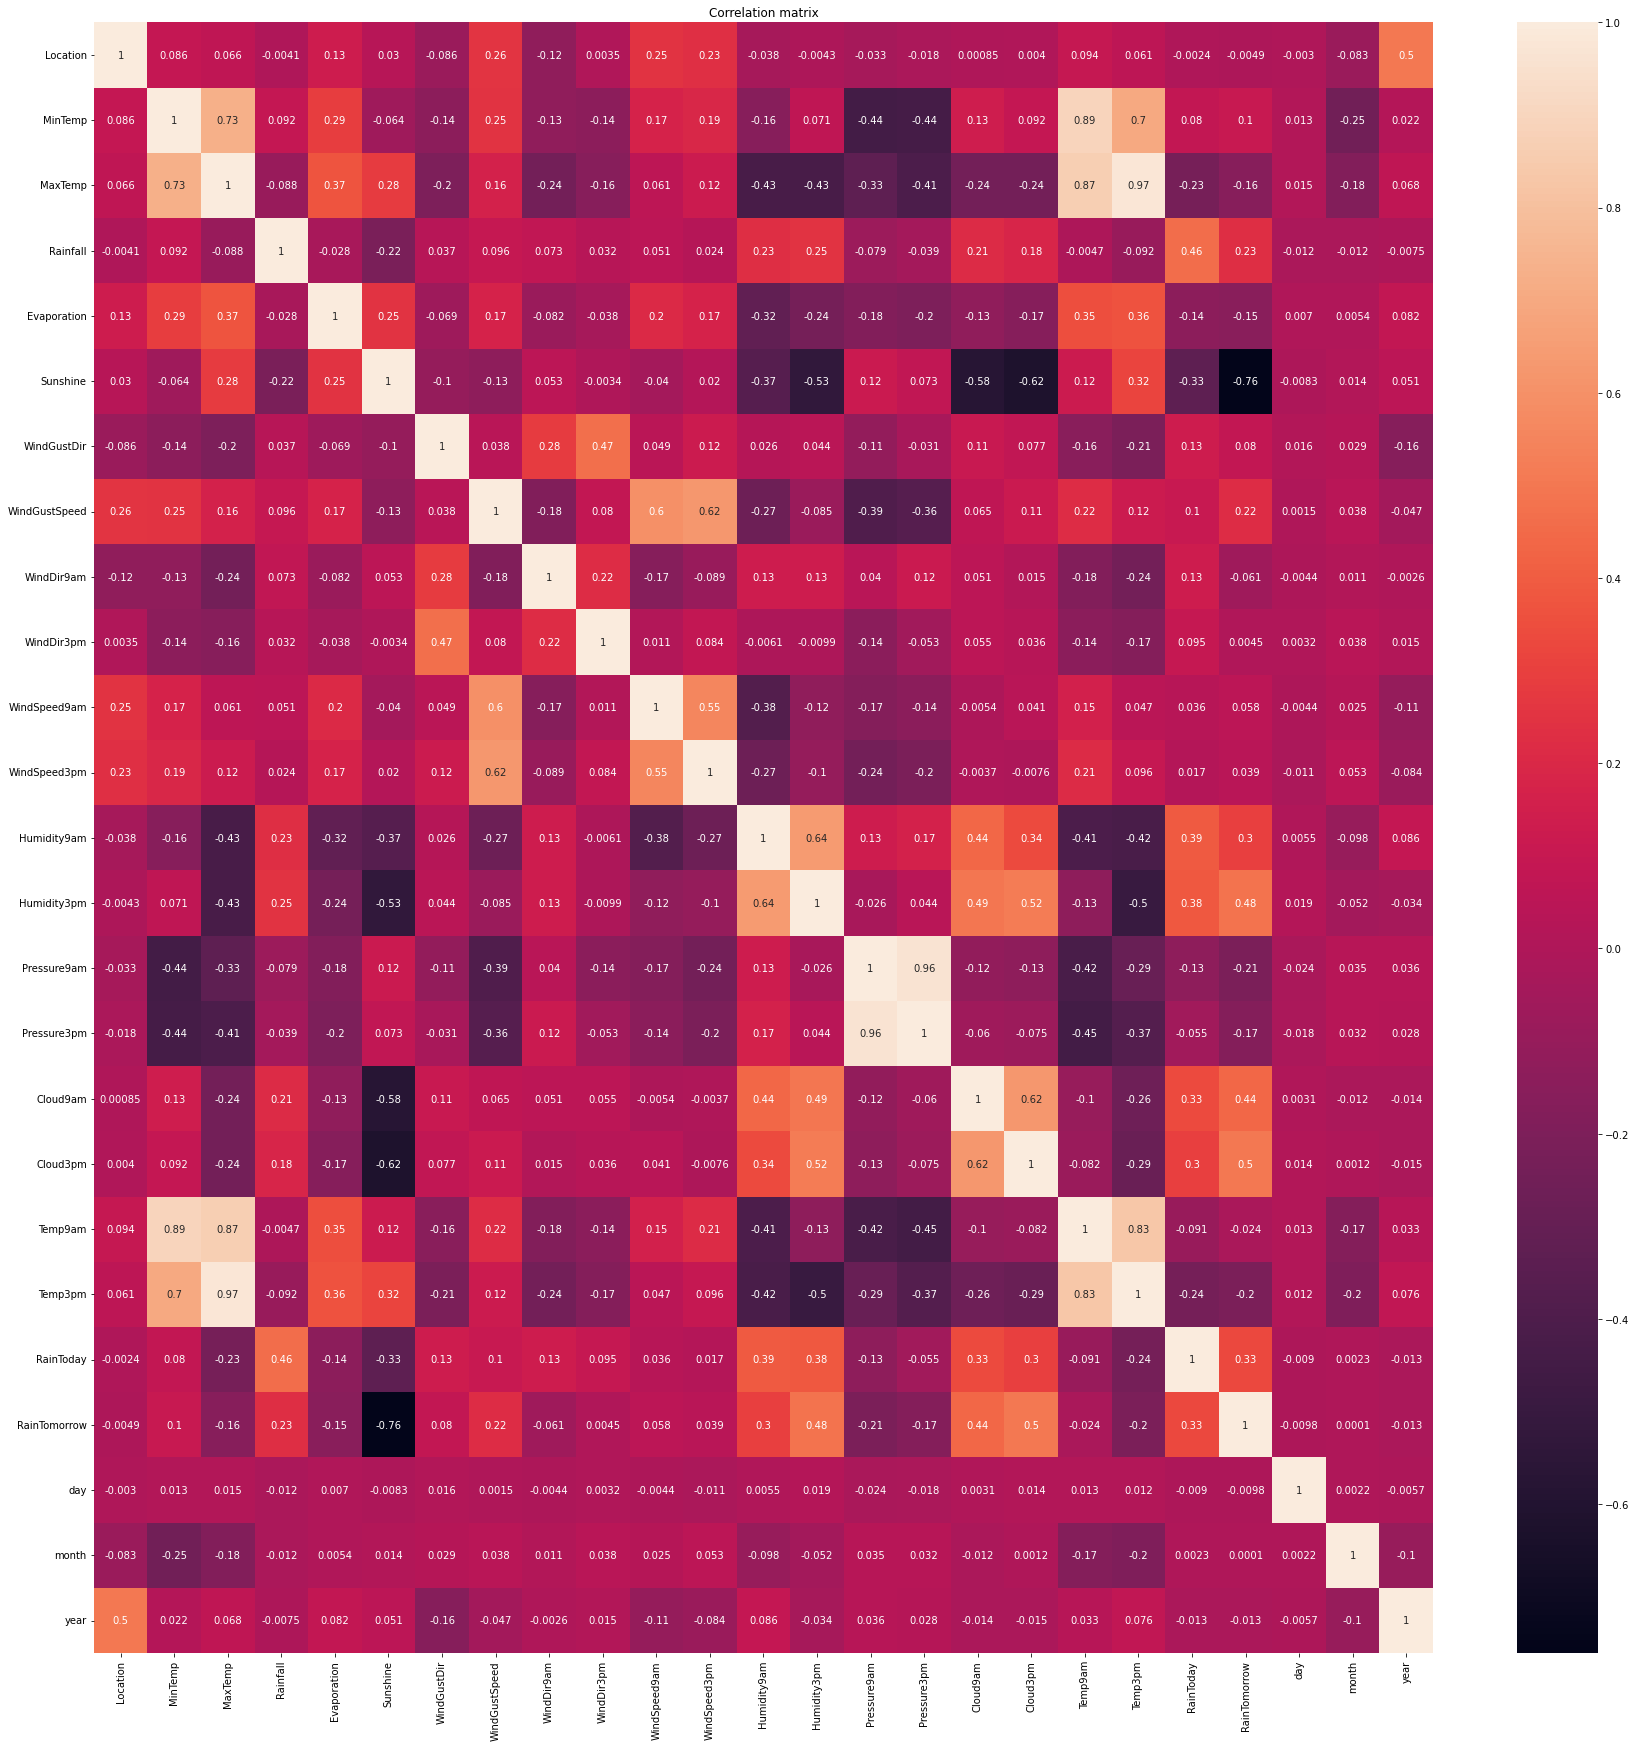

In [605]:
#plotting heatmap

plt.figure(figsize=(30,30))
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.title('Correlation matrix')
plt.show()

# Checking for outliers in dataset

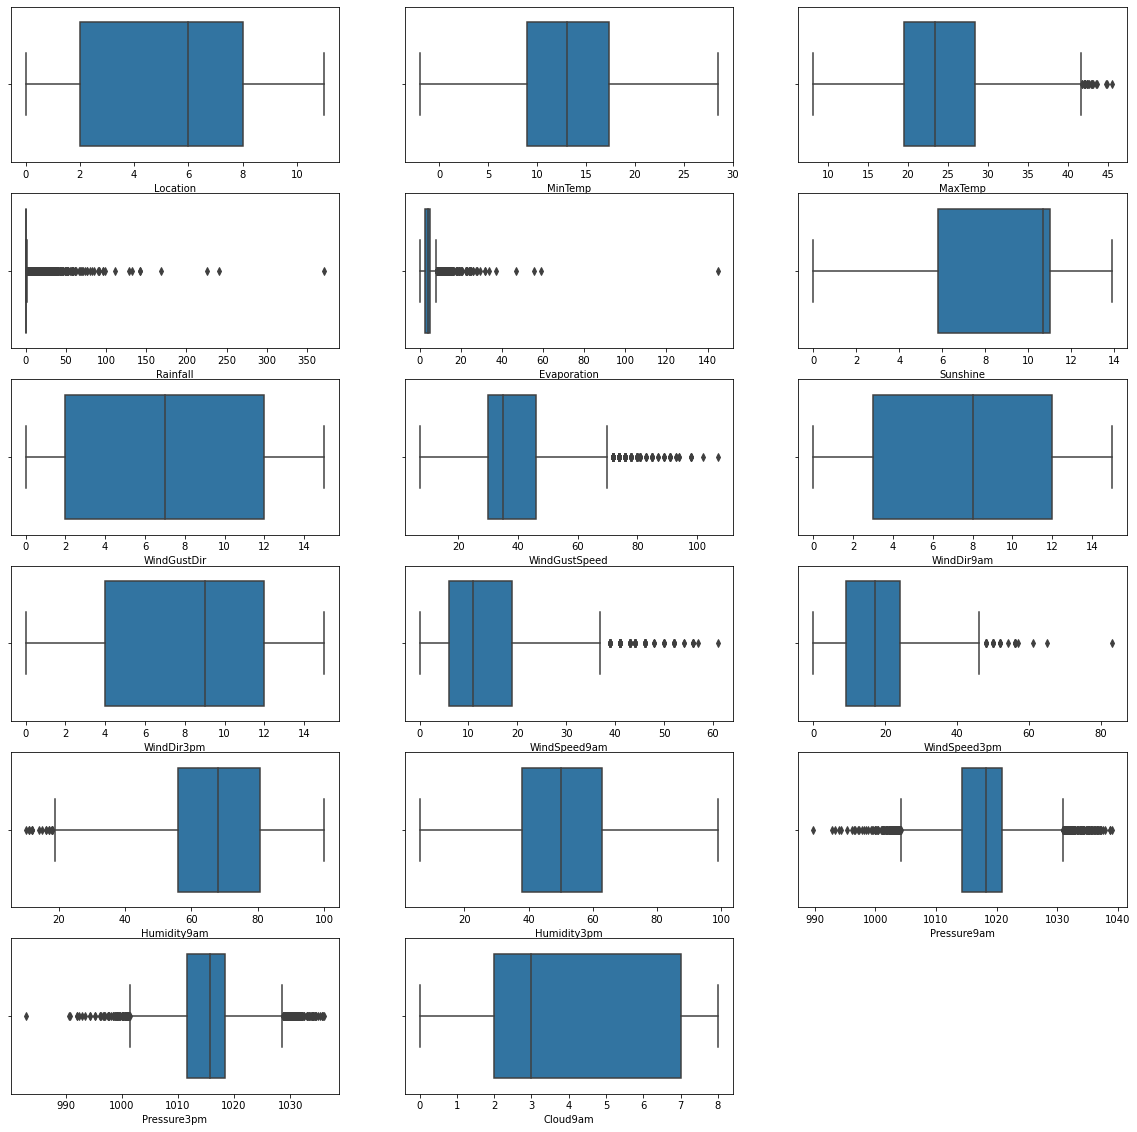

In [606]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in df:
    if plotnumber<=17:
        ax=plt.subplot(6,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

Outliers can be seen in this columns:**'MaxTemp', 'Evaporation','WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm'**

# Removal of outliers using z-score method

In [607]:
z_score=zscore(df[['MaxTemp','Evaporation','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Pressure9am','Pressure3pm']])

In [608]:
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)

In [609]:
df=df[filtering_entry]

In [610]:
df.shape

(6306, 25)

# Data loss after removing outliers

In [611]:
# data loss percentage 
data_loss=((6558-6306)/6306)*100
print(f'data loss in percent after removing outliers is: {data_loss}%')

data loss in percent after removing outliers is: 3.9961941008563278%


# Checking for skewness in dataset

In [612]:
df.skew()

Location          0.009675
MinTemp          -0.072651
MaxTemp           0.299276
Rainfall         14.113982
Evaporation       1.390994
Sunshine         -1.019961
WindGustDir       0.110464
WindGustSpeed     0.557565
WindDir9am       -0.174518
WindDir3pm       -0.126250
WindSpeed9am      0.681920
WindSpeed3pm      0.348993
Humidity9am      -0.237170
Humidity3pm       0.156179
Pressure9am       0.070168
Pressure3pm       0.098936
Cloud9am          0.043477
Cloud3pm          0.119231
Temp9am          -0.062894
Temp3pm           0.330404
RainToday         1.236743
RainTomorrow      1.281753
day               0.003718
month             0.041200
year              0.357397
dtype: float64

It can be seen that some of the continuous data columns have skewness present.
# Confirming that with distplots below.

In [613]:
skew_cols=['Evaporation','Sunshine','WindGustSpeed','WindSpeed9am']

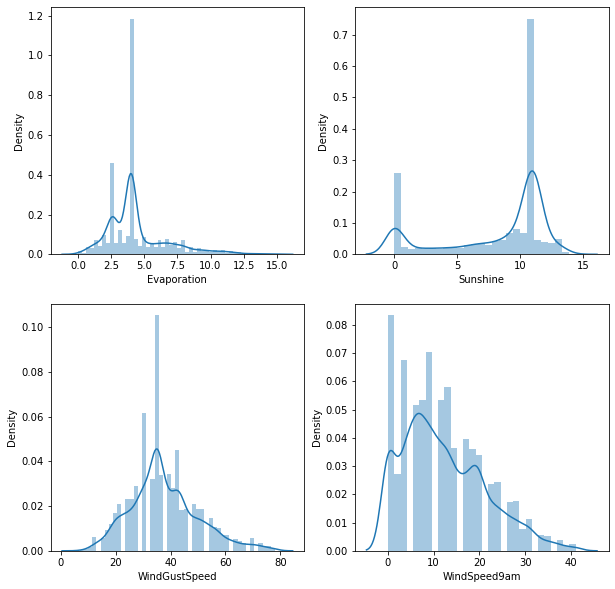

In [614]:
plt.figure(figsize=(10,10))
plotnumber=1

for column in skew_cols:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

- Data is skewed as seen in plots. The above specified columns are those whose skewness score is >+-0.5.
# Hence removing skewness using Power Transformer

In [615]:
scaler=PowerTransformer(method='yeo-johnson') #using yeo-johnson method to transform

In [616]:
#transforming the data
df[skew_cols]=scaler.fit_transform(df[skew_cols])

In [617]:
#printing features to check for skewness
df[skew_cols].skew()

Evaporation      0.007532
Sunshine        -0.809272
WindGustSpeed    0.005230
WindSpeed9am    -0.133027
dtype: float64

In [618]:
#Splitting the data into features and label
#Feature
X=df.drop(['Rainfall'],axis=1)
#Label
Y=df['Rainfall']

# Scaling the data

In [619]:
#Standardizing data
scaler=StandardScaler()

In [620]:
#scaling features

x_scaled=scaler.fit_transform(X)

In [621]:
x_scaled

array([[-1.38476537,  0.06730828,  1.05511512, ..., -0.53636268,
         1.67798672, -1.76380994],
       [-1.38476537,  0.51666673, -0.38584797, ..., -0.4227482 ,
         1.67798672, -1.76380994],
       [-1.38476537,  0.19312865, -0.51835032, ...,  0.1453242 ,
         1.67798672, -1.76380994],
       ...,
       [ 1.20941352, -1.69417686,  0.21041262, ...,  0.71339659,
        -0.12075267,  2.17602276],
       [ 1.20941352, -1.37063877,  0.47541733, ...,  0.82701107,
        -0.12075267,  2.17602276],
       [ 1.20941352, -0.93925465,  0.49198012, ...,  0.94062555,
        -0.12075267,  2.17602276]])

# VIF

In [622]:
#importing VIF library

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [623]:
vif=pd.DataFrame()
vif['vif_values']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['feature_names']=X.columns
vif

,vif_values,feature_names
0,1.651905,Location
1,9.443717,MinTemp
2,26.119191,MaxTemp
3,1.755485,Evaporation
4,3.652161,Sunshine
5,1.520866,WindGustDir
6,2.305955,WindGustSpeed
7,1.305121,WindDir9am
8,1.451591,WindDir3pm
9,2.038733,WindSpeed9am


**So we can see that MaxTemp,Pressure9am,Pressure3pm,Temp9am,Temp3pm are highly multicorrealted so dropping them.**

In [624]:
#dropping columns
X.drop(['MaxTemp','Pressure9am','Pressure3pm','Temp9am','Temp3pm'],axis=1,inplace=True)

In [625]:
X

,Location,MinTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow,day,month,year
1,1,13.4,-0.803052,-1.799993,3,-0.574668,10,2,0.655967,6.0,48.0,22.0,7.0,7.0,0,1,11,12,2008
2,1,15.9,-0.803052,-1.799993,5,-0.484205,4,1,0.475525,13.0,89.0,91.0,8.0,8.0,1,1,12,12,2008
4,1,14.1,-0.803052,-1.799993,1,-1.365569,11,0,0.075813,9.0,69.0,82.0,8.0,1.0,0,1,17,12,2008
5,1,13.5,-0.803052,-1.799993,13,1.845177,3,14,-0.538256,20.0,80.0,65.0,8.0,1.0,1,1,18,12,2008
6,1,19.7,-0.803052,-1.799993,14,0.718692,7,15,0.826350,30.0,49.0,22.0,7.0,7.0,0,1,29,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6619,9,3.5,-0.002178,0.687672,0,-0.484205,2,0,0.475525,13.0,59.0,27.0,3.0,3.0,0,0,20,6,2017
6620,9,2.8,-0.002178,0.687672,0,-0.484205,9,1,0.283047,11.0,51.0,24.0,3.0,3.0,0,0,21,6,2017
6621,9,3.6,-0.002178,0.687672,6,-1.365569,9,3,0.283047,9.0,56.0,21.0,3.0,3.0,0,0,22,6,2017
6622,9,5.4,-0.002178,0.687672,3,0.028238,9,14,-0.150104,9.0,53.0,24.0,3.0,3.0,0,0,23,6,2017


# Using Select KBest feature selection method to find best features to build a model.

In [626]:
best_features=SelectKBest(score_func=f_classif,k=16)
fit=best_features.fit(X,Y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)
feature_score=pd.concat([df_columns,df_scores],axis=1)
feature_score.columns=['Feature Name','Score']
print(feature_score.nlargest(16,'Score'))

     Feature Name     Score
14      RainToday       inf
10    Humidity9am  7.503113
11    Humidity3pm  7.222976
15   RainTomorrow  5.816629
3        Sunshine  5.669815
12       Cloud9am  5.083205
13       Cloud3pm  4.176302
2     Evaporation  3.062707
4     WindGustDir  1.625220
6      WindDir9am  1.534477
9    WindSpeed3pm  1.504879
5   WindGustSpeed  1.470479
18           year  1.355953
8    WindSpeed9am  1.282770
7      WindDir3pm  1.137010
1         MinTemp  1.132680


In [627]:
x=df[['RainToday','Humidity9am','Humidity3pm','RainTomorrow','Sunshine','Cloud9am','Cloud3pm','Evaporation','WindGustDir','WindDir9am','WindSpeed3pm','WindGustSpeed','year','WindSpeed9am','WindDir3pm','MinTemp']]
x

,RainToday,Humidity9am,Humidity3pm,RainTomorrow,Sunshine,Cloud9am,Cloud3pm,Evaporation,WindGustDir,WindDir9am,WindSpeed3pm,WindGustSpeed,year,WindSpeed9am,WindDir3pm,MinTemp
1,0,48.0,22.0,1,-1.799993,7.0,7.0,-0.803052,3,10,6.0,-0.574668,2008,0.655967,2,13.4
2,1,89.0,91.0,1,-1.799993,8.0,8.0,-0.803052,5,4,13.0,-0.484205,2008,0.475525,1,15.9
4,0,69.0,82.0,1,-1.799993,8.0,1.0,-0.803052,1,11,9.0,-1.365569,2008,0.075813,0,14.1
5,1,80.0,65.0,1,-1.799993,8.0,1.0,-0.803052,13,3,20.0,1.845177,2008,-0.538256,14,13.5
6,0,49.0,22.0,1,-1.799993,7.0,7.0,-0.803052,14,7,30.0,0.718692,2008,0.826350,15,19.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6619,0,59.0,27.0,0,0.687672,3.0,3.0,-0.002178,0,2,13.0,-0.484205,2017,0.475525,0,3.5
6620,0,51.0,24.0,0,0.687672,3.0,3.0,-0.002178,0,9,11.0,-0.484205,2017,0.283047,1,2.8
6621,0,56.0,21.0,0,0.687672,3.0,3.0,-0.002178,6,9,9.0,-1.365569,2017,0.283047,3,3.6
6622,0,53.0,24.0,0,0.687672,3.0,3.0,-0.002178,3,9,9.0,0.028238,2017,-0.150104,14,5.4


# Scaling the data

In [628]:
#Standardizing data
scaler=StandardScaler()

In [630]:
#scaling features

x_scaled=scaler.fit_transform(X)

In [631]:
x_scaled

array([[-1.38476537,  0.06730828, -0.80305231, ..., -0.53636268,
         1.67798672, -1.76380994],
       [-1.38476537,  0.51666673, -0.80305231, ..., -0.4227482 ,
         1.67798672, -1.76380994],
       [-1.38476537,  0.19312865, -0.80305231, ...,  0.1453242 ,
         1.67798672, -1.76380994],
       ...,
       [ 1.20941352, -1.69417686, -0.0021782 , ...,  0.71339659,
        -0.12075267,  2.17602276],
       [ 1.20941352, -1.37063877, -0.0021782 , ...,  0.82701107,
        -0.12075267,  2.17602276],
       [ 1.20941352, -0.93925465, -0.0021782 , ...,  0.94062555,
        -0.12075267,  2.17602276]])

# Model Building part

In [632]:
#importing library for regression model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

#importing r2 score
from sklearn.metrics import r2_score

#importing train test split
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [633]:
rf=RandomForestRegressor()
ab=AdaBoostRegressor()
dt=DecisionTreeRegressor()
gbdt=GradientBoostingRegressor()

In [634]:
#finding best random state for random forest model
for i in range(0,50):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,Y,test_size=0.25,random_state=i)
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_train)
    pred=rf.predict(x_test)
    print('training score is ',(metrics.r2_score(y_train,y_pred)*100),' for random state ',i)
    print('testing score is ',(metrics.r2_score(y_test,pred)*100),' for random state ',i)
    print('\n')

training score is  89.10876050394565  for random state  0
testing score is  15.723482469154293  for random state  0


training score is  88.42561563265528  for random state  1
testing score is  18.534250042592515  for random state  1


training score is  88.34322068575176  for random state  2
testing score is  18.496188089429765  for random state  2


training score is  87.19860444906496  for random state  3
testing score is  27.549254426268977  for random state  3


training score is  89.34099935277993  for random state  4
testing score is  17.001801268109094  for random state  4


training score is  88.31083121084875  for random state  5
testing score is  -3.432912146035738  for random state  5


training score is  87.86397204456453  for random state  6
testing score is  30.388554652561485  for random state  6


training score is  91.12055835060929  for random state  7
testing score is  10.250875296683038  for random state  7


training score is  89.60837651275546  for random state  

#Taking random state as 13.

In [635]:
#making train and test data split

x_train,x_test,y_train,y_test=train_test_split(x_scaled,Y,test_size=0.25,random_state=13)

In [636]:
rf.fit(x_train,y_train)


RandomForestRegressor()

In [637]:
# since thge model is already trained, below code will help to predict based on train and test data

y_pred=rf.predict(x_train) 

pred=rf.predict(x_test)

#printing r2 score for testing and training models.
#r2 score give value of how good the model has studied and learnt the data

print(f'training R2 score:{r2_score(y_train,y_pred)*100:.2f}%')
print(f'testing R2 score:{r2_score(y_test,pred)*100:.2f}%')

training R2 score:87.61%
testing R2 score:32.95%


# finding cross validation score

In [638]:
#finding best value for cv in provided range
for i in range(2,20):
    cv_score=cross_val_score(rf,x_scaled,Y,cv=i)
    cv=cv_score.mean()
    print('At cv:-',i)
    print('cross validation score:- ',cv*100)

At cv:- 2
cross validation score:-  8.30556294936956
At cv:- 3
cross validation score:-  13.625690529769233
At cv:- 4
cross validation score:-  15.69384400437331
At cv:- 5
cross validation score:-  17.975551025863364
At cv:- 6
cross validation score:-  18.28297938143463
At cv:- 7
cross validation score:-  17.72192582922962
At cv:- 8
cross validation score:-  15.231156079844087
At cv:- 9
cross validation score:-  16.354910114149515
At cv:- 10
cross validation score:-  18.2156851785032
At cv:- 11
cross validation score:-  18.752659250819136
At cv:- 12
cross validation score:-  17.49354656761603
At cv:- 13
cross validation score:-  9.718500793757594
At cv:- 14
cross validation score:-  14.483054703380343
At cv:- 15
cross validation score:-  17.78468039417463
At cv:- 16
cross validation score:-  17.625712211979604
At cv:- 17
cross validation score:-  11.538175845801707
At cv:- 18
cross validation score:-  16.41799794066868
At cv:- 19
cross validation score:-  10.6262259953349


In [639]:
#cross validation score
print('Cross Validation Score for Random Forest regressor model :- ',((cross_val_score(rf,x_scaled,Y,cv=11).mean())*100))

Cross Validation Score for Random Forest regressor model :-  19.677700444923634


In [640]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred)))

mean absolute error 2.153599873176918
root mean squared error 5.925500535755528


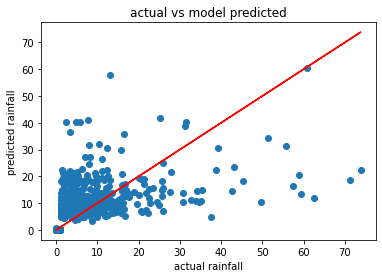

In [641]:
#plotting scatter plot for predicted vs actual

plt.scatter(y_test,pred)
plt.plot(y_test,y_test,color='r')
plt.xlabel('actual rainfall')
plt.ylabel('predicted rainfall')
plt.title('actual vs model predicted')
plt.show()

# AdaBoost Regressor

In [642]:
ab.fit(x_train,y_train)

AdaBoostRegressor()

In [643]:
# since thge model is already trained, below code will help to predict based on train and test data

y_pred=ab.predict(x_train) 

pred=ab.predict(x_test)

#printing r2 score for testing and training models.
#r2 score give value of how good the model has studied and learnt the data

print(f'training R2 score:{r2_score(y_train,y_pred)*100:.2f}%')
print(f'testing R2 score:{r2_score(y_test,pred)*100:.2f}%')

training R2 score:-15.71%
testing R2 score:-155.70%


In [644]:
#cross validation score
print('Cross Validation Score for AdaBoost regressor model :- ',((cross_val_score(ab,x_scaled,Y,cv=19).mean())*100))

Cross Validation Score for AdaBoost regressor model :-  -280.32142276183384


In [645]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred)))

mean absolute error 10.360913861435584
root mean squared error 11.571345971316003


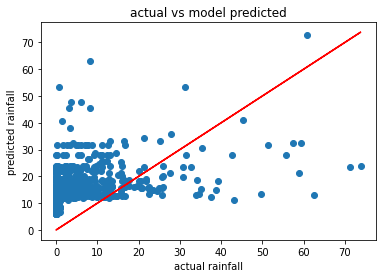

In [646]:
#plotting scatter plot for predicted vs actual

plt.scatter(y_test,pred)
plt.plot(y_test,y_test,color='r')
plt.xlabel('actual rainfall')
plt.ylabel('predicted rainfall')
plt.title('actual vs model predicted')
plt.show()

# Decision Tree Regressor

In [647]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [648]:
# since thge model is already trained, below code will help to predict based on train and test data

y_pred=dt.predict(x_train) 

pred=dt.predict(x_test)

#printing r2 score for testing and training models.
#r2 score give value of how good the model has studied and learnt the data

print(f'training R2 score:{r2_score(y_train,y_pred)*100:.2f}%')
print(f'testing R2 score:{r2_score(y_test,pred)*100:.2f}%')

training R2 score:100.00%
testing R2 score:-220.10%


In [654]:
#cross validation score
print('Cross Validation Score for Decision Tree regressor model :- ',((cross_val_score(dt,x_scaled,Y,cv=19).mean())*100))

Cross Validation Score for Decision Tree regressor model :-  -88.2642297379038


In [650]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred)))

mean absolute error 3.0876981610653136
root mean squared error 12.946810116796355


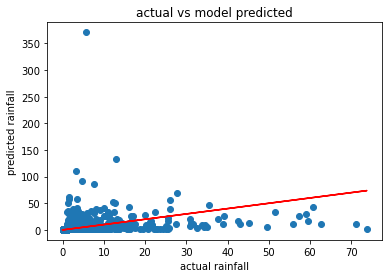

In [651]:
#plotting scatter plot for predicted vs actual

plt.scatter(y_test,pred)
plt.plot(y_test,y_test,color='r')
plt.xlabel('actual rainfall')
plt.ylabel('predicted rainfall')
plt.title('actual vs model predicted')
plt.show()

# Gradient Boosting Regressor

In [652]:
gbdt.fit(x_train,y_train)

GradientBoostingRegressor()

In [653]:
# since thge model is already trained, below code will help to predict based on train and test data

y_pred=gbdt.predict(x_train) 

pred=gbdt.predict(x_test)

#printing r2 score for testing and training models.
#r2 score give value of how good the model has studied and learnt the data

print(f'training R2 score:{r2_score(y_train,y_pred)*100:.2f}%')
print(f'testing R2 score:{r2_score(y_test,pred)*100:.2f}%')

training R2 score:63.91%
testing R2 score:6.28%


In [655]:
#cross validation score
print('Cross Validation Score for Gradient Boosting regressor model :- ',((cross_val_score(gbdt,x_scaled,Y,cv=19).mean())*100))

Cross Validation Score for Gradient Boosting regressor model :-  26.411572305461355


In [656]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred)))

mean absolute error 2.403028640405144
root mean squared error 7.005303126542082


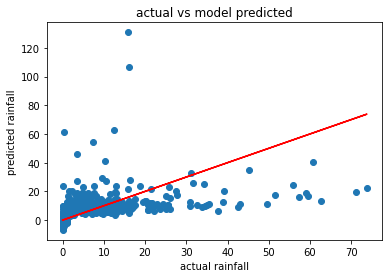

In [657]:
#plotting scatter plot for predicted vs actual

plt.scatter(y_test,pred)
plt.plot(y_test,y_test,color='r')
plt.xlabel('actual rainfall')
plt.ylabel('predicted rainfall')
plt.title('actual vs model predicted')
plt.show()

- Looking at all the scores, looks like Random Forest is the best model.
# Hence Hyperparameter tuning Random Forest model

In [658]:
#importing GridSearchCV library
from sklearn.model_selection import GridSearchCV

In [662]:
#setting parameters for tuning
grid_param=[{'criterion':["squared_error", "absolute_error", "poisson"],
           'min_samples_split':[2,2.5],
            'max_depth':[1,2],
            'bootstrap':[True,False]}]

In [663]:
grid=GridSearchCV(rf,param_grid=grid_param)

In [664]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [True, False],
                          'criterion': ['squared_error', 'absolute_error',
                                        'poisson'],
                          'max_depth': [1, 2], 'min_samples_split': [2, 2.5]}])

In [667]:
#best parameters for tuning
grid.best_params_

{'bootstrap': True,
 'criterion': 'poisson',
 'max_depth': 2,
 'min_samples_split': 2}

In [668]:
#using best parameters to train

rf1=RandomForestRegressor(criterion='poisson'
                          ,min_samples_split=2,
                          max_depth=2,
                          bootstrap=True)

In [669]:
rf1.fit(x_train,y_train)

RandomForestRegressor(criterion='poisson', max_depth=2)

In [670]:
# since thge model is already trained, below code will help to predict based on train and test data

y_pred=rf1.predict(x_train) 

pred=rf1.predict(x_test)

#printing r2 score for testing and training models.
#r2 score give value of how good the model has studied and learnt the data

print(f'training R2 score:{r2_score(y_train,y_pred)*100:.2f}%')
print(f'testing R2 score:{r2_score(y_test,pred)*100:.2f}%')

training R2 score:23.42%
testing R2 score:39.04%


In [671]:
#cross validation score
print('Cross Validation Score for Random forest tuned model :- ',((cross_val_score(rf1,x_scaled,Y,cv=19).mean())*100))

Cross Validation Score for Random forest tuned model :-  29.874814485033358


In [672]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred)))

mean absolute error 2.0701306741382837
root mean squared error 5.650062764991718


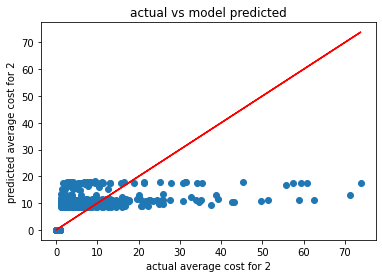

In [673]:
#plotting scatter plot for predicted vs actual

plt.scatter(y_test,pred)
plt.plot(y_test,y_test,color='r')
plt.xlabel('actual average cost for 2')
plt.ylabel('predicted average cost for 2')
plt.title('actual vs model predicted')
plt.show()

Ince the tuned model gives less testing and training accuracy, hence saving original random forest model.

# Saving the model using pickle

In [674]:
pickle.dump(rf,open('Rainfall_rf','wb'))